<a href="https://colab.research.google.com/github/PikalounJM/Team-Project/blob/main/Earthquake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1) ÏßÄÏßÑ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import openpyxl

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/·Ñå·Öµ·Ñå·Öµ·Ü´·ÑÄ·Ö©·Üº·ÑÜ·Ö©·Ñå·Ö•·Ü´/earthquake.xls') #Íµ≠ÎÇ¥ÏßÄÏßÑÏù¥Î†• Îç∞Ïù¥ÌÑ∞
df_gb = pd.read_excel('/content/drive/MyDrive/·Ñå·Öµ·Ñå·Öµ·Ü´·ÑÄ·Ö©·Üº·ÑÜ·Ö©·Ñå·Ö•·Ü´/df_gb.xlsx') #Í≤∞Ìï©Îç∞Ïù¥ÌÑ∞
ground = pd.read_excel('/content/drive/MyDrive/·Ñå·Öµ·Ñå·Öµ·Ü´·ÑÄ·Ö©·Üº·ÑÜ·Ö©·Ñå·Ö•·Ü´/ground.xlsx') #ÏßÄÌïòÏàòÏàòÏúÑÎ≥ÄÌôî Îç∞Ïù¥ÌÑ∞
people = pd.read_excel('/content/drive/MyDrive/·Ñå·Öµ·Ñå·Öµ·Ü´·ÑÄ·Ö©·Üº·ÑÜ·Ö©·Ñå·Ö•·Ü´/region_people.xlsx') #Í≤ΩÎ∂Å Ïù∏Íµ¨ Ïàò Îç∞Ïù¥ÌÑ∞
fault = pd.read_excel('/content/drive/MyDrive/·Ñå·Öµ·Ñå·Öµ·Ü´·ÑÄ·Ö©·Üº·ÑÜ·Ö©·Ñå·Ö•·Ü´/fault.xlsx') #Íµ≠ÎÇ¥Îã®Ï∏µÎç∞Ïù¥ÌÑ∞
rainy = pd.read_csv('/content/drive/MyDrive/·Ñå·Öµ·Ñå·Öµ·Ü´·ÑÄ·Ö©·Üº·ÑÜ·Ö©·Ñå·Ö•·Ü´/rainy.csv', encoding='cp949') #Íµ≠ÎÇ¥Ïû•ÎßàÎç∞Ïù¥ÌÑ∞
ground_built = pd.read_excel('/content/drive/MyDrive/·Ñå·Öµ·Ñå·Öµ·Ü´·ÑÄ·Ö©·Üº·ÑÜ·Ö©·Ñå·Ö•·Ü´/ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å.xlsx') #Íµ≠ÎÇ¥ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å Îç∞Ïù¥ÌÑ∞

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Î∞úÏÉùÏãúÍ∞Å    2051 non-null   datetime64[ns]
 1   Í∑úÎ™®      2051 non-null   float64       
 2   ÍπäÏù¥(km)  1309 non-null   object        
 3   ÏµúÎåÄÏßÑÎèÑ    578 non-null    object        
 4   ÏúÑÎèÑ      2051 non-null   object        
 5   Í≤ΩÎèÑ      2051 non-null   object        
 6   ÏúÑÏπò      2051 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 112.3+ KB


In [ ]:
df.head()

Î∞úÏÉùÏãúÍ∞Å   Í∑úÎ™® ÍπäÏù¥(km) ÏµúÎåÄÏßÑÎèÑ       ÏúÑÎèÑ        Í≤ΩÎèÑ  \
0 2025-06-13 01:57:14  2.1     18    ‚Ö†  40.67 N  128.29 E   
1 2025-06-12 21:49:16  2.7     19    ‚Ö†  35.06 N  125.08 E   
2 2025-06-10 23:53:28  2.2     13    ‚Ö¢  38.33 N  128.58 E   
3 2025-06-07 03:25:17  2.2      -    ‚Ö†  39.10 N  126.76 E   
4 2025-05-28 00:17:31  2.0     17    ‚Ö†  35.55 N  129.65 E   

                       ÏúÑÏπò  
0   Î∂ÅÌïú ÏñëÍ∞ïÎèÑ ÌíçÏÇ∞ ÎÇ®ÎèôÏ™Ω 20km ÏßÄÏó≠  
1  Ï†ÑÎÇ® Ïã†ÏïàÍµ∞ ÌùëÏÇ∞ÎèÑ Î∂ÅÏÑúÏ™Ω 53km Ìï¥Ïó≠  
2     Í∞ïÏõê Í≥†ÏÑ±Íµ∞ ÎèôÎÇ®ÎèôÏ™Ω 11km Ìï¥Ïó≠  
3  Î∂ÅÌïú ÌèâÏïàÎÇ®ÎèÑ ÏñëÎçï ÎÇ®ÎèôÏ™Ω 16km ÏßÄÏó≠  
4      Ïö∏ÏÇ∞ ÎèôÍµ¨ ÎèôÎ∂ÅÎèôÏ™Ω 22km Ìï¥Ïó≠

In [ ]:
df.isnull().sum()

Î∞úÏÉùÏãúÍ∞Å         0
Í∑úÎ™®           0
ÍπäÏù¥(km)     742
ÏµúÎåÄÏßÑÎèÑ      1473
ÏúÑÎèÑ           0
Í≤ΩÎèÑ           0
ÏúÑÏπò           0
dtype: int64

In [ ]:
#Í≤∞Ï∏°Ïπò Ìñâ Ï∂îÏ∂ú(ÍπäÏù¥/ÏµúÎåÄÏßÑÎèÑ)
df[df['ÍπäÏù¥(km)'].isna()]
df[df['ÏµúÎåÄÏßÑÎèÑ'].isna()]

Î∞úÏÉùÏãúÍ∞Å   Í∑úÎ™® ÍπäÏù¥(km) ÏµúÎåÄÏßÑÎèÑ       ÏúÑÎèÑ        Í≤ΩÎèÑ  \
531  2019-01-02 07:20:29  2.8     12  NaN  41.30 N  129.21 E   
549  2018-11-19 03:34:49  2.1     19  NaN  36.42 N  127.30 E   
553  2018-10-25 05:53:46  2.3     16  NaN  35.76 N  129.19 E   
579  2018-07-04 04:39:40  2.1     10  NaN  37.30 N  127.70 E   
580  2018-07-01 15:33:22  2.2     18  NaN  37.63 N  129.48 E   
...                  ...  ...    ...  ...      ...       ...   
2046 1995-02-05 12:59:56  2.6    NaN  NaN  39.60 N  126.00 E   
2047 1995-02-02 15:56:30  2.5    NaN  NaN  38.90 N  126.00 E   
2048 1995-01-29 17:02:58  2.4    NaN  NaN  38.90 N  126.00 E   
2049 1995-01-21 07:39:59  3.3    NaN  NaN  34.20 N  125.00 E   
2050 1995-01-14 06:43:25  3.0    NaN  NaN  37.90 N  124.50 E   

                           ÏúÑÏπò  
531   Î∂ÅÌïú Ìï®Í≤ΩÎ∂ÅÎèÑ Í∏∏Ï£º Î∂ÅÎ∂ÅÏÑúÏ™Ω 40km ÏßÄÏó≠  
549         ÎåÄÏ†Ñ Ïú†ÏÑ±Íµ¨ Î∂ÅÏÑúÏ™Ω 8km ÏßÄÏó≠  
553        Í≤ΩÎ∂Å Í≤ΩÏ£ºÏãú ÎÇ®ÎÇ®ÏÑúÏ™Ω 9km ÏßÄÏó≠  
579          Í≤ΩÍ∏∞ Ïó¨Ï£ºÏãú ÎèôÏ™Ω 6km ÏßÄÏó≠  
580        Í∞ïÏõê ÏÇºÏ≤ôÏãú Î∂ÅÎèôÏ™Ω 34km Ìï¥Ïó≠  
...                       ...  
2046   Î∂ÅÌïú ÌèâÏïàÎÇ®ÎèÑ Í∞úÏ≤ú ÎÇ®ÎèôÏ™Ω 14km ÏßÄÏó≠  
2047       Î∂ÅÌïú ÌèâÏñë ÎèôÎÇ®ÎèôÏ™Ω 26km ÏßÄÏó≠  
2048       Î∂ÅÌïú ÌèâÏñë ÎèôÎÇ®ÎèôÏ™Ω 26km ÏßÄÏó≠  
2049   Ï†ÑÎÇ® Ïã†ÏïàÍµ∞ Í∞ÄÍ±∞ÎèÑ Î∂ÅÏÑúÏ™Ω 20km Ìï¥Ïó≠  
2050      Ïù∏Ï≤ú Î∞±Î†πÎèÑ ÏÑúÎÇ®ÏÑúÏ™Ω 17km Ìï¥Ïó≠  

[1473 rows x 7 columns]

In [ ]:
#Îç∞Ïù¥ÌÑ∞ count
df['Í∑úÎ™®'].value_counts().sort_values(ascending=False).head(10).reset_index()

Í∑úÎ™®  count
0  2.1    265
1  2.2    244
2  2.4    206
3  2.5    204
4  2.3    203
5  2.0    160
6  2.6    140
7  2.7    126
8  2.9     98
9  2.8     89

In [ ]:
df['ÏµúÎåÄÏßÑÎèÑ'].value_counts().reset_index()

ÏµúÎåÄÏßÑÎèÑ  count
0    ‚Ö†    383
1    ‚Ö¢     79
2    ‚Ö°     78
3    ‚Ö£     28
4    ‚Ö§     10

# 2) Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

> ## 2-1) ÏßÄÏßÑÎç∞Ïù¥ÌÑ∞ Î∞úÏÉùÏúÑÏπò Î∂ÑÌï†



In [ ]:
#Í≥µÎ∞±ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏúÑÏπò Î∂ÑÌï†
import re #Ï†ïÍ∑úÌëúÌòÑÏãù ÏßÄÏõê
df['location_split'] = df['ÏúÑÏπò'].apply(lambda x: re.split(" ", str(x))[:2]) #Î∂ÑÌï† ÌõÑ, ÏïûÏóê 2Í∞ú ÏöîÏÜåÎßå Í∞ÄÏ†∏Ïò§Í∏∞

In [ ]:
df[['ÏúÑÏπò','location_split']].head(10)

ÏúÑÏπò location_split
0    Î∂ÅÌïú ÏñëÍ∞ïÎèÑ ÌíçÏÇ∞ ÎÇ®ÎèôÏ™Ω 20km ÏßÄÏó≠      [Î∂ÅÌïú, ÏñëÍ∞ïÎèÑ]
1   Ï†ÑÎÇ® Ïã†ÏïàÍµ∞ ÌùëÏÇ∞ÎèÑ Î∂ÅÏÑúÏ™Ω 53km Ìï¥Ïó≠      [Ï†ÑÎÇ®, Ïã†ÏïàÍµ∞]
2      Í∞ïÏõê Í≥†ÏÑ±Íµ∞ ÎèôÎÇ®ÎèôÏ™Ω 11km Ìï¥Ïó≠      [Í∞ïÏõê, Í≥†ÏÑ±Íµ∞]
3   Î∂ÅÌïú ÌèâÏïàÎÇ®ÎèÑ ÏñëÎçï ÎÇ®ÎèôÏ™Ω 16km ÏßÄÏó≠     [Î∂ÅÌïú, ÌèâÏïàÎÇ®ÎèÑ]
4       Ïö∏ÏÇ∞ ÎèôÍµ¨ ÎèôÎ∂ÅÎèôÏ™Ω 22km Ìï¥Ïó≠       [Ïö∏ÏÇ∞, ÎèôÍµ¨]
5  Î∂ÅÌïú Ìô©Ìï¥Î∂ÅÎèÑ ÏÜ°Î¶º ÎÇ®ÎÇ®ÎèôÏ™Ω 13km ÏßÄÏó≠     [Î∂ÅÌïú, Ìô©Ìï¥Î∂ÅÎèÑ]
6      Í≤ΩÎ∂Å ÍπÄÏ≤úÏãú ÎèôÎ∂ÅÎèôÏ™Ω 14km ÏßÄÏó≠      [Í≤ΩÎ∂Å, ÍπÄÏ≤úÏãú]
7   Ï†ÑÎÇ® Ïã†ÏïàÍµ∞ ÌùëÏÇ∞ÎèÑ Î∂ÅÏÑúÏ™Ω 83km Ìï¥Ïó≠      [Ï†ÑÎÇ®, Ïã†ÏïàÍµ∞]
8       Í≤ΩÍ∏∞ Ïó∞Ï≤úÍµ∞ Î∂ÅÎ∂ÅÎèôÏ™Ω 4km ÏßÄÏó≠      [Í≤ΩÍ∏∞, Ïó∞Ï≤úÍµ∞]
9       Í≤ΩÍ∏∞ Ïó∞Ï≤úÍµ∞ Î∂ÅÎ∂ÅÎèôÏ™Ω 5km ÏßÄÏó≠      [Í≤ΩÍ∏∞, Ïó∞Ï≤úÍµ∞]

In [ ]:
#df['date_only'] = pd.to_datetime(df['Î∞úÏÉùÏãúÍ∞Å']).dt.date #datetimeÏùÄ ÎÖÑ/Ïõî/ÏùºÎ°úÎßå Íµ¨ÏÑ±
df['year'] = df['Î∞úÏÉùÏãúÍ∞Å'].dt.year
df['month'] = df['Î∞úÏÉùÏãúÍ∞Å'].dt.month
df['day'] = df['Î∞úÏÉùÏãúÍ∞Å'].dt.day_name()

In [ ]:
#ÏúÑÏπòÎ•º Í∞Å Ïó¥Î°ú Î∂ÑÎ¶¨
df[['ÌñâÏ†ïÍµ¨','ÏßÄÏó≠']] = pd.DataFrame(df['location_split'].tolist(), index=df.index)
df.drop(columns='location_split', inplace=True)
df.head(5)

Î∞úÏÉùÏãúÍ∞Å   Í∑úÎ™® ÍπäÏù¥(km) ÏµúÎåÄÏßÑÎèÑ       ÏúÑÎèÑ        Í≤ΩÎèÑ  \
0 2025-06-13 01:57:14  2.1     18    ‚Ö†  40.67 N  128.29 E   
1 2025-06-12 21:49:16  2.7     19    ‚Ö†  35.06 N  125.08 E   
2 2025-06-10 23:53:28  2.2     13    ‚Ö¢  38.33 N  128.58 E   
3 2025-06-07 03:25:17  2.2      -    ‚Ö†  39.10 N  126.76 E   
4 2025-05-28 00:17:31  2.0     17    ‚Ö†  35.55 N  129.65 E   

                       ÏúÑÏπò  year  month        day ÌñâÏ†ïÍµ¨    ÏßÄÏó≠  
0   Î∂ÅÌïú ÏñëÍ∞ïÎèÑ ÌíçÏÇ∞ ÎÇ®ÎèôÏ™Ω 20km ÏßÄÏó≠  2025      6     Friday  Î∂ÅÌïú   ÏñëÍ∞ïÎèÑ  
1  Ï†ÑÎÇ® Ïã†ÏïàÍµ∞ ÌùëÏÇ∞ÎèÑ Î∂ÅÏÑúÏ™Ω 53km Ìï¥Ïó≠  2025      6   Thursday  Ï†ÑÎÇ®   Ïã†ÏïàÍµ∞  
2     Í∞ïÏõê Í≥†ÏÑ±Íµ∞ ÎèôÎÇ®ÎèôÏ™Ω 11km Ìï¥Ïó≠  2025      6    Tuesday  Í∞ïÏõê   Í≥†ÏÑ±Íµ∞  
3  Î∂ÅÌïú ÌèâÏïàÎÇ®ÎèÑ ÏñëÎçï ÎÇ®ÎèôÏ™Ω 16km ÏßÄÏó≠  2025      6   Saturday  Î∂ÅÌïú  ÌèâÏïàÎÇ®ÎèÑ  
4      Ïö∏ÏÇ∞ ÎèôÍµ¨ ÎèôÎ∂ÅÎèôÏ™Ω 22km Ìï¥Ïó≠  2025      5  Wednesday  Ïö∏ÏÇ∞    ÎèôÍµ¨

In [ ]:
#Ïó∞ÎèÑÎ≥Ñ/ÏõîÎ≥Ñ Î∞úÏÉù Ïù¥Î†•
df['year'].value_counts().sort_index().reset_index().head(10)

year  count
0  1995     29
1  1996     39
2  1997     21
3  1998     32
4  1999     37
5  2000     29
6  2001     41
7  2002     49
8  2003     38
9  2004     42



> ## 2-2) ÌñâÏ†ïÍµ¨Ïó≠Î≥Ñ Ïû•Îßà Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨



In [ ]:
#Ïû•ÎßàÎç∞Ïù¥ÌÑ∞
rainy['ÏãúÏûëÏùº'] = pd.to_datetime(rainy['ÏãúÏûëÏùº'], format='%Y.%m.%d')
rainy['year'] = rainy['ÏãúÏûëÏùº'].dt.year
rainy['month'] = rainy['ÏãúÏûëÏùº'].dt.month
#rainy.drop(columns=['start_month'], inplace=True)

In [ ]:
rainy

ÌñâÏ†ïÍµ¨  ÏßÄÏó≠        ÏãúÏûëÏùº        Ï¢ÖÎ£åÏùº  Ïû•ÎßàÏùºÏàò  Í∞ïÏàòÏùºÏàò   Ìï©Í≥ÑÍ∞ïÏàòÎüâ  year  month
0     Í≤ΩÎ∂Å  Ïö∏ÏßÑ 1995-06-30  1995.7.27    28    14    84.0  1995      6
1     Í≤ΩÎ∂Å  ÏïàÎèô 1995-06-30  1995.7.27    28    14   147.9  1995      6
2     Í≤ΩÎ∂Å  Ìè¨Ìï≠ 1995-06-30  1995.7.27    28    15   116.9  1995      6
3     Í≤ΩÎ∂Å  Î¥âÌôî 1995-06-30  1995.7.27    28    15   177.5  1995      6
4     Í≤ΩÎ∂Å  ÏòÅÏ£º 1995-06-30  1995.7.27    28    16   212.5  1995      6
...   ..  ..        ...        ...   ...   ...     ...   ...    ...
1586  Í¥ëÏ£º  Í¥ëÏ£º 2021-07-03  2021.7.19    17     9   201.8  2021      7
1587  Í¥ëÏ£º  Í¥ëÏ£º 2022-06-23  2022.7.25    33    17   209.6  2022      6
1588  Í¥ëÏ£º  Í¥ëÏ£º 2023-06-25  2023.7.26    32    25  1102.5  2023      6
1589  Í¥ëÏ£º  Í¥ëÏ£º 2024-06-22  2024.7.27    36    23   392.8  2024      6
1590  ÏÑúÏö∏  ÏÑúÏö∏ 2004-06-25  2004.7.18    24    17   495.2  2004      6

[1591 rows x 9 columns]

In [ ]:
rainy_gb = rainy[rainy['ÌñâÏ†ïÍµ¨']=='Í≤ΩÎ∂Å']
rainy_gb

ÌñâÏ†ïÍµ¨  ÏßÄÏó≠        ÏãúÏûëÏùº        Ï¢ÖÎ£åÏùº  Ïû•ÎßàÏùºÏàò  Í∞ïÏàòÏùºÏàò  Ìï©Í≥ÑÍ∞ïÏàòÎüâ  year  month
0    Í≤ΩÎ∂Å  Ïö∏ÏßÑ 1995-06-30  1995.7.27    28    14   84.0  1995      6
1    Í≤ΩÎ∂Å  ÏïàÎèô 1995-06-30  1995.7.27    28    14  147.9  1995      6
2    Í≤ΩÎ∂Å  Ìè¨Ìï≠ 1995-06-30  1995.7.27    28    15  116.9  1995      6
3    Í≤ΩÎ∂Å  Î¥âÌôî 1995-06-30  1995.7.27    28    15  177.5  1995      6
4    Í≤ΩÎ∂Å  ÏòÅÏ£º 1995-06-30  1995.7.27    28    16  212.5  1995      6
..   ..  ..        ...        ...   ...   ...    ...   ...    ...
295  Í≤ΩÎ∂Å  Î¨∏Í≤Ω 2024-06-22  2024.7.27    36    22  541.8  2024      6
296  Í≤ΩÎ∂Å  ÏòÅÎçï 2024-06-22  2024.7.27    36    17  175.4  2024      6
297  Í≤ΩÎ∂Å  ÏùòÏÑ± 2024-06-22  2024.7.27    36    21  342.9  2024      6
298  Í≤ΩÎ∂Å  Íµ¨ÎØ∏ 2024-06-22  2024.7.27    36    20  351.4  2024      6
299  Í≤ΩÎ∂Å  ÏòÅÏ≤ú 2024-06-22  2024.7.27    36    20  441.1  2024      6

[300 rows x 9 columns]

In [ ]:
rainy_gb['ÏßÄÏó≠'].value_counts()

ÏßÄÏó≠
Ïö∏ÏßÑ    30
ÏïàÎèô    30
Ìè¨Ìï≠    30
Î¥âÌôî    30
ÏòÅÏ£º    30
Î¨∏Í≤Ω    30
ÏòÅÎçï    30
ÏùòÏÑ±    30
Íµ¨ÎØ∏    30
ÏòÅÏ≤ú    30
Name: count, dtype: int64



> ## 2-3) ÌñâÏ†ïÍµ¨Ïó≠Î≥Ñ ÏßÄÌïòÏàò Í∞úÎ∞ú Ïã§Ï†Å Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨





In [ ]:
ground_built.head()

Ïó∞ÎèÑ   Í≤ΩÍ∏∞   Í∞ïÏõê   Ï∂©Î∂Å   Ï∂©ÎÇ®   Ï†ÑÎ∂Å   Ï†ÑÎÇ®   Í≤ΩÎ∂Å   Í≤ΩÎÇ®  Ï†úÏ£º
0  1995    -   65  100   96  146   57    -  190   -
1  1996   34  179   56   65   91   13   44   83   -
2  1997  110  197  124   75  106   20  115  120   -
3  1998  157  131  100  144  194  128  119  209  53
4  1999   54   90   58   56  104   85  147  112  36

In [ ]:
#Ïó∞ÎèÑ,ÌñâÏ†ïÍµ¨,ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å(meltÌï®ÏàòÎ°ú Í∞ÄÎ°úÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏÑ∏Î°úÎ°ú Î∞îÍæ∏Îäî ÌòïÌÉú)
gb = ground_built.melt(id_vars='Ïó∞ÎèÑ', var_name='ÌñâÏ†ïÍµ¨', value_name='ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å') #id_vars:id Î≥ÄÏàò
gb['ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å'] = pd.to_numeric(gb['ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å'], errors='coerce')
gb = gb.dropna() #Í≤∞Ï∏°Í∞í Ìñâ Ï†úÍ±∞

In [ ]:
gb.head()

year ÌñâÏ†ïÍµ¨  ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å
1  1996  Í≤ΩÍ∏∞       34
2  1997  Í≤ΩÍ∏∞      110
3  1998  Í≤ΩÍ∏∞      157
4  1999  Í≤ΩÍ∏∞       54
5  2000  Í≤ΩÍ∏∞      199

In [ ]:
gb = gb.rename(columns={'Ïó∞ÎèÑ':'year'})
gb['ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å'] = gb['ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å'].astype(int)
gb['ÌñâÏ†ïÍµ¨'].value_counts().reset_index()

ÌñâÏ†ïÍµ¨  count
0  Í∞ïÏõê     30
1  Ï†ÑÎÇ®     30
2  Ï∂©Î∂Å     30
3  Ï∂©ÎÇ®     30
4  Ï†ÑÎ∂Å     30
5  Í≤ΩÎÇ®     30
6  Í≤ΩÍ∏∞     29
7  Í≤ΩÎ∂Å     29
8  Ï†úÏ£º     25

In [ ]:
#ÏßÄÏßÑÏù¥Î†•Ïùò Ïó∞ÎèÑ/ÌñâÏ†ïÍµ¨Í∞Ä ÎèôÏùºÌïòÎ©¥ ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å ÏòÜÏóê Î∂ôÏù¥Í∏∞
#mergeÌï®ÏàòÎäî Îëê dfÎ•º Í∞Å Îç∞Ïù¥ÌÑ∞Ïóê Ï°¥Ïû¨ÌïòÎäî Í≥†Ïú†Í∞íÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©Ìï†Îïå ÏÇ¨Ïö©
df_merged = df.merge(gb[['year','ÌñâÏ†ïÍµ¨','ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å']], on=['year','ÌñâÏ†ïÍµ¨'], how='left')
df_merged['ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å'] = df_merged['ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å'].fillna(0)
df_merged['ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å'] = df_merged['ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å'].astype(int)

In [ ]:
df_merged[['year','ÌñâÏ†ïÍµ¨','ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å']]

year ÌñâÏ†ïÍµ¨  ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å
0     2025  Î∂ÅÌïú        0
1     2025  Ï†ÑÎÇ®        0
2     2025  Í∞ïÏõê        0
3     2025  Î∂ÅÌïú        0
4     2025  Ïö∏ÏÇ∞        0
...    ...  ..      ...
2046  1995  Î∂ÅÌïú        0
2047  1995  Î∂ÅÌïú        0
2048  1995  Î∂ÅÌïú        0
2049  1995  Ï†ÑÎÇ®       57
2050  1995  Ïù∏Ï≤ú        0

[2051 rows x 3 columns]



> ## 2-4) Í¥ÄÏ∏°ÏÜåÎ≥Ñ ÏßÄÌïòÏàò ÏàòÏúÑ Î≥ÄÌôî ÌòÑÌô© Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨('25.6Ïõî Í∏∞Ï§Ä)



In [ ]:
ground = pd.read_excel('/content/drive/MyDrive/·Ñå·Öµ·Ñå·Öµ·Ü´·ÑÄ·Ö©·Üº·ÑÜ·Ö©·Ñå·Ö•·Ü´/ground.xlsx')

In [ ]:
#ÏßÄÌïòÏàòÏàòÏúÑÌòÑÌô©
ground.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ÏàòÏúÑÏÉÅÌÉú           115 non-null    object 
 1   Ï∂©Ï†Å/ÏïîÎ∞ò          115 non-null    object 
 2   ÏßÄÏó≠ÌäπÏÑ±           115 non-null    object 
 3   Íµ¨Í≤Ω             115 non-null    int64  
 4   Ïã¨ÎèÑ             115 non-null    int64  
 5   ÌñâÏ†ïÍµ¨            115 non-null    object 
 6   ÏßÄÏó≠             115 non-null    object 
 7   ÌèâÎÖÑÏàòÏúÑ           115 non-null    float64
 8   Ï†ÑÎÖÑÏàòÏúÑ           115 non-null    float64
 9   ÌòÑÏû¨ÏàòÏúÑ           115 non-null    float64
 10  ÌèâÎÖÑÎåÄÎπÑ
ÌòÑÏû¨ÏàòÏúÑÏ∞®(m)  115 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 10.0+ KB


In [ ]:
ground

ÏàòÏúÑÏÉÅÌÉú Ï∂©Ï†Å/ÏïîÎ∞ò ÏßÄÏó≠ÌäπÏÑ±   Íµ¨Í≤Ω   Ïã¨ÎèÑ ÌñâÏ†ïÍµ¨  ÏßÄÏó≠    ÌèâÎÖÑÏàòÏúÑ    Ï†ÑÎÖÑÏàòÏúÑ    ÌòÑÏû¨ÏàòÏúÑ ÌèâÎÖÑÎåÄÎπÑ\nÌòÑÏû¨ÏàòÏúÑÏ∞®(m)
0     Ï†ïÏÉÅ    ÏïîÎ∞ò   Ìï¥Ïïà  350   60  Í≤ΩÎ∂Å  Ìè¨Ìï≠    9.42    9.01    9.25       -0.17 ÌïòÍ∞ï
1     Ï†ïÏÉÅ    ÏïîÎ∞ò   Ìï¥Ïïà  200   50  Í≤ΩÎ∂Å  Ìè¨Ìï≠    5.42    5.25    4.81       -0.61 ÌïòÍ∞ï
2     Ï†ïÏÉÅ    ÏïîÎ∞ò   Ìï¥Ïïà  350   45  Í≤ΩÎ∂Å  Ìè¨Ìï≠   37.61   37.16   37.18       -0.43 ÌïòÍ∞ï
3     Ïã¨Í∞Å    ÏïîÎ∞ò   Ìï¥Ïïà  200   71  Í≤ΩÎ∂Å  Ìè¨Ìï≠  119.80  118.20  117.17       -2.63 ÌïòÍ∞ï
4     Ï†ïÏÉÅ    ÏïîÎ∞ò   Ìï¥Ïïà  200   63  Í≤ΩÎ∂Å  Ìè¨Ìï≠   78.90   78.81   78.65       -0.25 ÌïòÍ∞ï
..   ...   ...  ...  ...  ...  ..  ..     ...     ...     ...            ...
110   Ï†ïÏÉÅ    ÏïîÎ∞ò   ÎÇ¥Î•ô  200   60  Í≤ΩÎ∂Å  Î¥âÌôî  474.37  474.83  474.27       -0.10 ÌïòÍ∞ï
111   Ï†ïÏÉÅ    ÏïîÎ∞ò   ÎÇ¥Î•ô  200  200  Í≤ΩÎ∂Å  Î¥âÌôî   70.80   70.75   70.83        0.03 ÏÉÅÏäπ
112   Ï†ïÏÉÅ    ÏïîÎ∞ò   ÎÇ¥Î•ô  200   80  Í≤ΩÎ∂Å  Î¥âÌôî  391.85  391.54  391.54       -0.31 ÌïòÍ∞ï
113   Ïã¨Í∞Å    ÏïîÎ∞ò   ÎÇ¥Î•ô  250   60  Í≤ΩÎ∂Å  Î¥âÌôî  374.56  373.61  373.43       -1.13 ÌïòÍ∞ï
114   Ïã¨Í∞Å    ÏïîÎ∞ò   Ìï¥Ïïà  200  100  Í≤ΩÎ∂Å  Ïö∏ÏßÑ   43.37   43.20   37.35       -6.02 ÌïòÍ∞ï

[115 rows x 11 columns]

In [ ]:
ground = ground[ground['ÏãúÎèÑ']=='Í≤ΩÏÉÅÎ∂ÅÎèÑ']
ground['ÏãúÎèÑ'] = ground['ÏãúÎèÑ'].replace('Í≤ΩÏÉÅÎ∂ÅÎèÑ','Í≤ΩÎ∂Å') #Îç∞Ïù¥ÌÑ∞ Í∞í Î≥ÄÍ≤Ω

In [ ]:
ground['ÏãúÍµ∞Íµ¨'] = ground['ÏãúÍµ∞Íµ¨'].replace({'Ìè¨Ìï≠Ïãú Î∂ÅÍµ¨':'Ìè¨Ìï≠Ïãú', 'Ìè¨Ìï≠Ïãú ÎÇ®Íµ¨':'Ìè¨Ìï≠Ïãú'})

In [ ]:
ground['ÏãúÍµ∞Íµ¨'] = ground['ÏãúÍµ∞Íµ¨'].apply(lambda x: x[:-1] if x.endswith(('Íµ∞','Ïãú')) else x)
ground.rename(columns={'ÏãúÎèÑ':'ÌñâÏ†ïÍµ¨','ÏãúÍµ∞Íµ¨':'ÏßÄÏó≠'}, inplace=True)

In [ ]:
df_gb = df_result.merge(ground[['ÌñâÏ†ïÍµ¨','ÏßÄÏó≠','ÏàòÏúÑÏÉÅÌÉú','Ï∂©Ï†Å/ÏïîÎ∞ò','ÏßÄÏó≠ÌäπÏÑ±','Íµ¨Í≤Ω','Ïã¨ÎèÑ','ÌèâÎÖÑÏàòÏúÑ','Ï†ÑÎÖÑÏàòÏúÑ','ÌòÑÏû¨ÏàòÏúÑ','ÌèâÎÖÑÎåÄÎπÑ\nÌòÑÏû¨ÏàòÏúÑÏ∞®(m)']], on=['ÌñâÏ†ïÍµ¨','ÏßÄÏó≠'], how='left')
df_gb

Í∑úÎ™® ÍπäÏù¥(km) ÏµúÎåÄÏßÑÎèÑ        Í≤ΩÎèÑ                   ÏúÑÏπò  year  month ÌñâÏ†ïÍµ¨  ÏßÄÏó≠  \
0     2.4     13    ‚Ö¢  128.26 E  Í≤ΩÎ∂Å ÍπÄÏ≤úÏãú ÎèôÎ∂ÅÎèôÏ™Ω 14km ÏßÄÏó≠  2025      5  Í≤ΩÎ∂Å  ÍπÄÏ≤ú   
1     2.4     13    ‚Ö¢  128.26 E  Í≤ΩÎ∂Å ÍπÄÏ≤úÏãú ÎèôÎ∂ÅÎèôÏ™Ω 14km ÏßÄÏó≠  2025      5  Í≤ΩÎ∂Å  ÍπÄÏ≤ú   
2     2.4     13    ‚Ö¢  128.26 E  Í≤ΩÎ∂Å ÍπÄÏ≤úÏãú ÎèôÎ∂ÅÎèôÏ™Ω 14km ÏßÄÏó≠  2025      5  Í≤ΩÎ∂Å  ÍπÄÏ≤ú   
3     2.4     13    ‚Ö¢  128.26 E  Í≤ΩÎ∂Å ÍπÄÏ≤úÏãú ÎèôÎ∂ÅÎèôÏ™Ω 14km ÏßÄÏó≠  2025      5  Í≤ΩÎ∂Å  ÍπÄÏ≤ú   
4     2.4     13    ‚Ö¢  128.26 E  Í≤ΩÎ∂Å ÍπÄÏ≤úÏãú ÎèôÎ∂ÅÎèôÏ™Ω 14km ÏßÄÏó≠  2025      5  Í≤ΩÎ∂Å  ÍπÄÏ≤ú   
...   ...    ...  ...       ...                  ...   ...    ...  ..  ..   
4432  3.0    NaN    ‚Ö°  128.20 E   Í≤ΩÎ∂Å ÏÉÅÏ£ºÏãú ÎèôÎÇ®ÎèôÏ™Ω 4km ÏßÄÏó≠  1995      6  Í≤ΩÎ∂Å  ÏÉÅÏ£º   
4433  3.0    NaN    ‚Ö°  128.20 E   Í≤ΩÎ∂Å ÏÉÅÏ£ºÏãú ÎèôÎÇ®ÎèôÏ™Ω 4km ÏßÄÏó≠  1995      6  Í≤ΩÎ∂Å  ÏÉÅÏ£º   
4434  3.0    NaN    ‚Ö°  128.20 E   Í≤ΩÎ∂Å ÏÉÅÏ£ºÏãú ÎèôÎÇ®ÎèôÏ™Ω 4km ÏßÄÏó≠  1995      6  Í≤ΩÎ∂Å  ÏÉÅÏ£º   
4435  3.0    NaN    ‚Ö°  128.20 E   Í≤ΩÎ∂Å ÏÉÅÏ£ºÏãú ÎèôÎÇ®ÎèôÏ™Ω 4km ÏßÄÏó≠  1995      6  Í≤ΩÎ∂Å  ÏÉÅÏ£º   
4436  3.0    NaN    ‚Ö°  128.20 E   Í≤ΩÎ∂Å ÏÉÅÏ£ºÏãú ÎèôÎÇ®ÎèôÏ™Ω 4km ÏßÄÏó≠  1995      6  Í≤ΩÎ∂Å  ÏÉÅÏ£º   

      ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å  ...  Ìï©Í≥ÑÍ∞ïÏàòÎüâ  ÏàòÏúÑÏÉÅÌÉú  Ï∂©Ï†Å/ÏïîÎ∞ò ÏßÄÏó≠ÌäπÏÑ±     Íµ¨Í≤Ω     Ïã¨ÎèÑ    ÌèâÎÖÑÏàòÏúÑ    Ï†ÑÎÖÑÏàòÏúÑ  \
0           0  ...    0.0    Ïã¨Í∞Å     ÏïîÎ∞ò   ÎÇ¥Î•ô  200.0  185.0   40.47   40.00   
1           0  ...    0.0    Ïã¨Í∞Å     ÏïîÎ∞ò   ÎÇ¥Î•ô  250.0   81.0   52.47   51.52   
2           0  ...    0.0    Ï†ïÏÉÅ     ÏïîÎ∞ò   ÎÇ¥Î•ô  200.0  100.0   94.78   93.45   
3           0  ...    0.0    Ïã¨Í∞Å     ÏïîÎ∞ò   ÎÇ¥Î•ô  250.0   81.0   77.54   77.11   
4           0  ...    0.0    Ï†ïÏÉÅ     ÏïîÎ∞ò   ÎÇ¥Î•ô  200.0  150.0  138.28  138.28   
...       ...  ...    ...   ...    ...  ...    ...    ...     ...     ...   
4432        0  ...    0.0    Ï†ïÏÉÅ     ÏïîÎ∞ò   ÎÇ¥Î•ô  250.0   62.0  284.90  284.91   
4433        0  ...    0.0    Ïã¨Í∞Å     ÏïîÎ∞ò   ÎÇ¥Î•ô  350.0   50.0   85.53   85.07   
4434        0  ...    0.0    Ïã¨Í∞Å     ÏïîÎ∞ò   ÎÇ¥Î•ô  350.0   40.0   81.79   81.55   
4435        0  ...    0.0    Ï†ïÏÉÅ     ÏïîÎ∞ò   ÎÇ¥Î•ô  250.0   62.0   82.34   82.36   
4436        0  ...    0.0    Ï†ïÏÉÅ     ÏïîÎ∞ò   ÎÇ¥Î•ô  250.0   62.0   64.38   64.49   

        ÌòÑÏû¨ÏàòÏúÑ ÌèâÎÖÑÎåÄÎπÑ\nÌòÑÏû¨ÏàòÏúÑÏ∞®(m)  
0      39.85       -0.62 ÌïòÍ∞ï  
1      51.41       -1.06 ÌïòÍ∞ï  
2      92.19       -2.59 ÌïòÍ∞ï  
3      75.68       -1.86 ÌïòÍ∞ï  
4     138.64        0.36 ÏÉÅÏäπ  
...      ...            ...  
4432  285.01        0.11 ÏÉÅÏäπ  
4433   84.95       -0.58 ÌïòÍ∞ï  
4434   81.45       -0.34 ÌïòÍ∞ï  
4435   82.50        0.16 ÏÉÅÏäπ  
4436   64.68        0.30 ÏÉÅÏäπ  

[4437 rows x 27 columns]

In [ ]:
ground.rename(columns={'ÌèâÎÖÑÎåÄÎπÑ\nÌòÑÏû¨ÏàòÏúÑÏ∞®(m)':'ÏàòÏúÑÏÉÅÏäπÏó¨Î∂Ä'}, inplace=True)

In [ ]:
ground['ÏàòÏúÑÏ∞®'] = ground['ÏàòÏúÑÏÉÅÏäπÏó¨Î∂Ä'].str.extract(r'([-+]?\d*\.?\d+)').astype(float) #ÏàòÏπòÎßå Î∂ÑÎ¶¨
ground['ÏàòÏúÑÏÉÅÏäπÏó¨Î∂Ä'] = ground['ÏàòÏúÑÏÉÅÏäπÏó¨Î∂Ä'].str.extract(r'(ÏÉÅÏäπ|ÌïòÍ∞ï)') #Î¨∏ÏûêÏó¥Îßå extract

In [ ]:
#Í≤∞Ï∏°Ïπò Ìñâ Ï†úÍ±∞
ground.dropna(subset=['ÏàòÏúÑÏÉÅÏäπÏó¨Î∂Ä','ÏàòÏúÑÏ∞®'], inplace=True)

In [ ]:
#ÏàòÏúÑÏÉÅÌÉú, ÏßÄÏó≠ÌäπÏÑ±, ÏàòÏúÑÏÉÅÏäπÏó¨Î∂ÄÏôÄ Í∞ôÏùÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÎäî ÏßÄÏó≠Î≥Ñ ÏµúÎπàÎèÑ Í∏∞Ï§ÄÏúºÎ°ú ÌèâÍ∑† Íµ¨ÌïòÍ∏∞
#Ïã¨ÎèÑ, ÌèâÎÖÑÏàòÏúÑ, Ï†ÑÎÖÑÏàòÏúÑ, ÌòÑÏû¨ÏàòÏúÑ, ÏàòÏúÑÏ∞®Îäî ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞

#ÏàòÏπòÌòï ÌèâÍ∑†
avg = ground.groupby(['ÌñâÏ†ïÍµ¨','ÏßÄÏó≠'], as_index=False).mean(numeric_only=True)

#Î≤îÏ£ºÌòï ÏµúÎπàÎèÑ Í∞í Íµ¨ÌïòÍ∏∞
def get_mode(series):
  return series.mode().iloc[0] if not series.mode().empty else None

#ÏàòÏúÑÏÉÅÌÉúÏôÄ ÏßÄÏó≠ÌäπÏÑ±, ÏàòÏúÑÏÉÅÏäπÏó¨Î∂ÄÏùò ÏµúÎπàÍ∞í Íµ¨ÌïòÍ∏∞
mode = ground.groupby(['ÌñâÏ†ïÍµ¨','ÏßÄÏó≠'], as_index=False).agg({'ÏàòÏúÑÏÉÅÌÉú':get_mode,
                                                         'ÏßÄÏó≠ÌäπÏÑ±':get_mode,
                                                         'ÏàòÏúÑÏÉÅÏäπÏó¨Î∂Ä':get_mode})

In [ ]:
df_ground = pd.merge(avg, mode, on=['ÌñâÏ†ïÍµ¨','ÏßÄÏó≠'], how='left')
df_ground.head()

ÌñâÏ†ïÍµ¨  ÏßÄÏó≠          Íµ¨Í≤Ω          Ïã¨ÎèÑ        ÌèâÎÖÑÏàòÏúÑ        Ï†ÑÎÖÑÏàòÏúÑ        ÌòÑÏû¨ÏàòÏúÑ  \
0  Í≤ΩÎ∂Å  Í≤ΩÏÇ∞  200.000000  100.000000  174.102500  170.865000  170.567500   
1  Í≤ΩÎ∂Å  Í≤ΩÏ£º  230.000000   78.600000   87.466000   86.508000   86.786000   
2  Í≤ΩÎ∂Å  Í≥†Î†π  200.000000  100.000000   33.193333   33.010000   32.696667   
3  Í≤ΩÎ∂Å  Íµ¨ÎØ∏  250.000000   83.166667   39.096667   36.603333   36.495000   
4  Í≤ΩÎ∂Å  ÍπÄÏ≤ú  216.666667  116.166667  103.835000  103.161667  102.796667   

        ÏàòÏúÑÏ∞® ÏàòÏúÑÏÉÅÌÉú ÏßÄÏó≠ÌäπÏÑ± ÏàòÏúÑÏÉÅÏäπÏó¨Î∂Ä  
0 -3.535000   Ï†ïÏÉÅ   ÎÇ¥Î•ô     ÌïòÍ∞ï  
1 -0.680000   Ï†ïÏÉÅ   ÎÇ¥Î•ô     ÌïòÍ∞ï  
2 -0.496667   Ï†ïÏÉÅ   ÎÇ¥Î•ô     ÌïòÍ∞ï  
3 -2.601667   Ï†ïÏÉÅ   ÎÇ¥Î•ô     ÌïòÍ∞ï  
4 -1.038333   Ïã¨Í∞Å   ÎÇ¥Î•ô     ÌïòÍ∞ï

In [ ]:
df_gb = df_result.merge(df_ground[['ÌñâÏ†ïÍµ¨','ÏßÄÏó≠','Íµ¨Í≤Ω','Ïã¨ÎèÑ','ÌèâÎÖÑÏàòÏúÑ','Ï†ÑÎÖÑÏàòÏúÑ','ÌòÑÏû¨ÏàòÏúÑ','ÏàòÏúÑÏ∞®','ÏàòÏúÑÏÉÅÌÉú','ÏßÄÏó≠ÌäπÏÑ±','ÏàòÏúÑÏÉÅÏäπÏó¨Î∂Ä']], on=['ÌñâÏ†ïÍµ¨','ÏßÄÏó≠'], how='left')
depth = ['Íµ¨Í≤Ω','Ïã¨ÎèÑ','ÌèâÎÖÑÏàòÏúÑ','Ï†ÑÎÖÑÏàòÏúÑ','ÌòÑÏû¨ÏàòÏúÑ','ÏàòÏúÑÏ∞®']
depth

['Íµ¨Í≤Ω', 'Ïã¨ÎèÑ', 'ÌèâÎÖÑÏàòÏúÑ', 'Ï†ÑÎÖÑÏàòÏúÑ', 'ÌòÑÏû¨ÏàòÏúÑ', 'ÏàòÏúÑÏ∞®']

In [ ]:
#ÌïúÎ≤àÏóê Ïó¨Îü¨ Í∞ú Ïó¥Ïùò ÏÜåÏàòÏ†ê 2ÏûêÎ¶¨ÍπåÏßÄÎßå Ï∂úÎ†•ÌïòÍ∏∞
depth = ['Íµ¨Í≤Ω','Ïã¨ÎèÑ','ÌèâÎÖÑÏàòÏúÑ','Ï†ÑÎÖÑÏàòÏúÑ','ÌòÑÏû¨ÏàòÏúÑ','ÏàòÏúÑÏ∞®']
df_gb[depth] = df_gb[depth].round(2)
df_gb

Í∑úÎ™® ÍπäÏù¥(km) ÏµúÎåÄÏßÑÎèÑ        Í≤ΩÎèÑ                   ÏúÑÏπò  year  month ÌñâÏ†ïÍµ¨  ÏßÄÏó≠  \
0    2.4     13    ‚Ö¢  128.26 E  Í≤ΩÎ∂Å ÍπÄÏ≤úÏãú ÎèôÎ∂ÅÎèôÏ™Ω 14km ÏßÄÏó≠  2025      5  Í≤ΩÎ∂Å  ÍπÄÏ≤ú   
1    2.5     16    ‚Ö¢  129.07 E   Í≤ΩÎ∂Å Í≤ΩÏ£ºÏãú ÎÇ®ÏÑúÏ™Ω 17km ÏßÄÏó≠  2025      5  Í≤ΩÎ∂Å  Í≤ΩÏ£º   
2    2.0     15    ‚Ö°  129.07 E   Í≤ΩÎ∂Å Í≤ΩÏ£ºÏãú ÎÇ®ÏÑúÏ™Ω 17km ÏßÄÏó≠  2025      5  Í≤ΩÎ∂Å  Í≤ΩÏ£º   
3    2.0     13    ‚Ö†  129.64 E  Í≤ΩÎ∂Å ÏòÅÎçïÍµ∞ ÎèôÎ∂ÅÎèôÏ™Ω 25km Ìï¥Ïó≠  2024     11  Í≤ΩÎ∂Å  ÏòÅÎçï   
4    2.5      8    ‚Ö£  128.35 E     Í≤ΩÎ∂Å Ïπ†Í≥°Íµ∞ ÏÑúÏ™Ω 5km ÏßÄÏó≠  2024     10  Í≤ΩÎ∂Å  Ïπ†Í≥°   
..   ...    ...  ...       ...                  ...   ...    ...  ..  ..   
634  2.6    NaN    ‚Ö°  128.10 E  Í≤ΩÎ∂Å ÏÉÅÏ£ºÏãú Î∂ÅÎ∂ÅÏÑúÏ™Ω 22km ÏßÄÏó≠  1995     12  Í≤ΩÎ∂Å  ÏÉÅÏ£º   
635  2.9    NaN    ‚Ö°  129.20 E  Í≤ΩÎ∂Å Ïö∏ÏßÑÍµ∞ ÏÑúÎÇ®ÏÑúÏ™Ω 21km ÏßÄÏó≠  1995     10  Í≤ΩÎ∂Å  Ïö∏ÏßÑ   
636  2.2    NaN    ‚Ö°  129.30 E     Í≤ΩÎ∂Å Ïö∏ÏßÑÍµ∞ ÏÑúÏ™Ω 9km ÏßÄÏó≠  1995      6  Í≤ΩÎ∂Å  Ïö∏ÏßÑ   
637  2.6    NaN    ‚Ö°  129.50 E  Í≤ΩÎ∂Å Ïö∏ÏßÑÍµ∞ ÎÇ®ÎÇ®ÎèôÏ™Ω 23km Ìï¥Ïó≠  1995      6  Í≤ΩÎ∂Å  Ïö∏ÏßÑ   
638  3.0    NaN    ‚Ö°  128.20 E   Í≤ΩÎ∂Å ÏÉÅÏ£ºÏãú ÎèôÎÇ®ÎèôÏ™Ω 4km ÏßÄÏó≠  1995      6  Í≤ΩÎ∂Å  ÏÉÅÏ£º   

     ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å  ...  Ìï©Í≥ÑÍ∞ïÏàòÎüâ      Íµ¨Í≤Ω      Ïã¨ÎèÑ    ÌèâÎÖÑÏàòÏúÑ    Ï†ÑÎÖÑÏàòÏúÑ    ÌòÑÏû¨ÏàòÏúÑ   ÏàòÏúÑÏ∞®  ÏàòÏúÑÏÉÅÌÉú  \
0          0  ...    0.0  216.67  116.17  103.84  103.16  102.80 -1.04    Ïã¨Í∞Å   
1          0  ...    0.0  230.00   78.60   87.47   86.51   86.79 -0.68    Ï†ïÏÉÅ   
2          0  ...    0.0  230.00   78.60   87.47   86.51   86.79 -0.68    Ï†ïÏÉÅ   
3        117  ...    0.0  200.00   96.00   58.35   58.34   58.28 -0.07    Ï†ïÏÉÅ   
4        117  ...    0.0  210.00   94.40   78.09   77.32   77.12 -0.97    Ï†ïÏÉÅ   
..       ...  ...    ...     ...     ...     ...     ...     ...   ...   ...   
634        0  ...    0.0  285.71   79.43  137.59  137.52  137.50 -0.09    Ï†ïÏÉÅ   
635        0  ...    0.0  200.00  100.00   43.37   43.20   37.35 -6.02    Ïã¨Í∞Å   
636        0  ...   84.0  200.00  100.00   43.37   43.20   37.35 -6.02    Ïã¨Í∞Å   
637        0  ...   84.0  200.00  100.00   43.37   43.20   37.35 -6.02    Ïã¨Í∞Å   
638        0  ...    0.0  285.71   79.43  137.59  137.52  137.50 -0.09    Ï†ïÏÉÅ   

     ÏßÄÏó≠ÌäπÏÑ±  ÏàòÏúÑÏÉÅÏäπÏó¨Î∂Ä  
0      ÎÇ¥Î•ô      ÌïòÍ∞ï  
1      ÎÇ¥Î•ô      ÌïòÍ∞ï  
2      ÎÇ¥Î•ô      ÌïòÍ∞ï  
3      ÎÇ¥Î•ô      ÏÉÅÏäπ  
4      ÎÇ¥Î•ô      ÌïòÍ∞ï  
..    ...     ...  
634    ÎÇ¥Î•ô      ÏÉÅÏäπ  
635    Ìï¥Ïïà      ÌïòÍ∞ï  
636    Ìï¥Ïïà      ÌïòÍ∞ï  
637    Ìï¥Ïïà      ÌïòÍ∞ï  
638    ÎÇ¥Î•ô      ÏÉÅÏäπ  

[639 rows x 27 columns]



> ## 2-5) Íµ≠ÎÇ¥ Îã®Ï∏µ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨



In [ ]:
fault = pd.read_excel('/content/drive/MyDrive/·Ñå·Öµ·Ñå·Öµ·Ü´·ÑÄ·Ö©·Üº·ÑÜ·Ö©·Ñå·Ö•·Ü´/fault.xlsx')
fault['Ïó∞Ïû•(km)'] = fault['Ïó∞Ïû•(km)'].astype(int)
fault = fault.replace({'ÏßÄÏó≠':'Î∂ÅÎ©¥'}, 'Ïö∏ÏßÑÍµ∞')

In [ ]:
fault.head()

Ïù¥Î¶Ñ  Ïó∞Ïû•(km) ÌñâÏ†ïÍµ¨   ÏßÄÏó≠
0  Í∞ÄÏÇ¨Î¶¨ Îã®Ï∏µ    64.0  Í∞ïÏõê  Ï†ïÏÑ†Íµ∞
1  Í∞ÄÏïºÎèô Îã®Ï∏µ    17.0  Í∞ïÏõê  ÏñëÏñëÍµ∞
2   Í∞ÄÏùå Îã®Ï∏µ    40.0  Í≤ΩÎ∂Å  ÏùòÏÑ±Íµ∞
3   Í¥ëÏ£º Îã®Ï∏µ   180.0  Ï†ÑÎÇ®  ÏßÑÏïàÍµ∞
4  Í≤ÄÏÑ±Îèô Îã®Ï∏µ     4.0  Í≤ΩÎ∂Å  Ïö∏ÏßÑÍµ∞

In [ ]:
fault_count = fault[['ÌñâÏ†ïÍµ¨','ÏßÄÏó≠']].value_counts().reset_index()
fault_count = fault_count[fault_count['ÌñâÏ†ïÍµ¨']=='Í≤ΩÎ∂Å']
fault_count['ÏßÄÏó≠'] = fault_count['ÏßÄÏó≠'].apply(lambda x: x[:-1] if x.endswith(('Íµ∞','Ïãú')) else x)
fault_count.rename(columns={'count':'Îã®Ï∏µÏàò'}, inplace=True)
fault_count

ÌñâÏ†ïÍµ¨  ÏßÄÏó≠  Îã®Ï∏µÏàò
2   Í≤ΩÎ∂Å  Í≤ΩÏ£º    5
3   Í≤ΩÎ∂Å  ÏÉÅÏ£º    3
4   Í≤ΩÎ∂Å  Ïö∏ÏßÑ    3
10  Í≤ΩÎ∂Å  ÏùòÏÑ±    2
11  Í≤ΩÎ∂Å  ÏïàÎèô    2
24  Í≤ΩÎ∂Å  Î¥âÌôî    1
25  Í≤ΩÎ∂Å  Î¨∏Í≤Ω    1
27  Í≤ΩÎ∂Å  ÏòÅÎçï    1
28  Í≤ΩÎ∂Å  ÏòÅÏ≤ú    1
29  Í≤ΩÎ∂Å  ÏòÅÏ£º    1
30  Í≤ΩÎ∂Å  ÏòàÏ≤ú    1
32  Í≤ΩÎ∂Å  Ìè¨Ìï≠    1

In [ ]:
#ÏßÄÏßÑÏù¥Î†•Ïóê Îã®Ï∏µÏàò Î∂ôÏù¥Í∏∞
df_gb = df_gb.merge(fault_count[['ÌñâÏ†ïÍµ¨','ÏßÄÏó≠','Îã®Ï∏µÏàò']], on=['ÌñâÏ†ïÍµ¨','ÏßÄÏó≠'], how='left')
df_gb

Unnamed: 0   Í∑úÎ™® ÍπäÏù¥(km) ÏµúÎåÄÏßÑÎèÑ        Í≤ΩÎèÑ                   ÏúÑÏπò  year  month  \
0             0  2.4     13    ‚Ö¢  128.26 E  Í≤ΩÎ∂Å ÍπÄÏ≤úÏãú ÎèôÎ∂ÅÎèôÏ™Ω 14km ÏßÄÏó≠  2025      5   
1             1  2.5     16    ‚Ö¢  129.07 E   Í≤ΩÎ∂Å Í≤ΩÏ£ºÏãú ÎÇ®ÏÑúÏ™Ω 17km ÏßÄÏó≠  2025      5   
2             2  2.0     15    ‚Ö°  129.07 E   Í≤ΩÎ∂Å Í≤ΩÏ£ºÏãú ÎÇ®ÏÑúÏ™Ω 17km ÏßÄÏó≠  2025      5   
3             3  2.0     13    ‚Ö†  129.64 E  Í≤ΩÎ∂Å ÏòÅÎçïÍµ∞ ÎèôÎ∂ÅÎèôÏ™Ω 25km Ìï¥Ïó≠  2024     11   
4             4  2.5      8    ‚Ö£  128.35 E     Í≤ΩÎ∂Å Ïπ†Í≥°Íµ∞ ÏÑúÏ™Ω 5km ÏßÄÏó≠  2024     10   
..          ...  ...    ...  ...       ...                  ...   ...    ...   
634         634  2.6    NaN    ‚Ö°  128.10 E  Í≤ΩÎ∂Å ÏÉÅÏ£ºÏãú Î∂ÅÎ∂ÅÏÑúÏ™Ω 22km ÏßÄÏó≠  1995     12   
635         635  2.9    NaN    ‚Ö°  129.20 E  Í≤ΩÎ∂Å Ïö∏ÏßÑÍµ∞ ÏÑúÎÇ®ÏÑúÏ™Ω 21km ÏßÄÏó≠  1995     10   
636         636  2.2    NaN    ‚Ö°  129.30 E     Í≤ΩÎ∂Å Ïö∏ÏßÑÍµ∞ ÏÑúÏ™Ω 9km ÏßÄÏó≠  1995      6   
637         637  2.6    NaN    ‚Ö°  129.50 E  Í≤ΩÎ∂Å Ïö∏ÏßÑÍµ∞ ÎÇ®ÎÇ®ÎèôÏ™Ω 23km Ìï¥Ïó≠  1995      6   
638         638  3.0    NaN    ‚Ö°  128.20 E   Í≤ΩÎ∂Å ÏÉÅÏ£ºÏãú ÎèôÎÇ®ÎèôÏ™Ω 4km ÏßÄÏó≠  1995      6   

    ÌñâÏ†ïÍµ¨  ÏßÄÏó≠  ...      Íµ¨Í≤Ω      Ïã¨ÎèÑ    ÌèâÎÖÑÏàòÏúÑ    Ï†ÑÎÖÑÏàòÏúÑ    ÌòÑÏû¨ÏàòÏúÑ   ÏàòÏúÑÏ∞®  ÏàòÏúÑÏÉÅÌÉú  ÏßÄÏó≠ÌäπÏÑ±  \
0    Í≤ΩÎ∂Å  ÍπÄÏ≤ú  ...  216.67  116.17  103.84  103.16  102.80 -1.04    Ïã¨Í∞Å    ÎÇ¥Î•ô   
1    Í≤ΩÎ∂Å  Í≤ΩÏ£º  ...  230.00   78.60   87.47   86.51   86.79 -0.68    Ï†ïÏÉÅ    ÎÇ¥Î•ô   
2    Í≤ΩÎ∂Å  Í≤ΩÏ£º  ...  230.00   78.60   87.47   86.51   86.79 -0.68    Ï†ïÏÉÅ    ÎÇ¥Î•ô   
3    Í≤ΩÎ∂Å  ÏòÅÎçï  ...  200.00   96.00   58.35   58.34   58.28 -0.07    Ï†ïÏÉÅ    ÎÇ¥Î•ô   
4    Í≤ΩÎ∂Å  Ïπ†Í≥°  ...  210.00   94.40   78.09   77.32   77.12 -0.97    Ï†ïÏÉÅ    ÎÇ¥Î•ô   
..   ..  ..  ...     ...     ...     ...     ...     ...   ...   ...   ...   
634  Í≤ΩÎ∂Å  ÏÉÅÏ£º  ...  285.71   79.43  137.59  137.52  137.50 -0.09    Ï†ïÏÉÅ    ÎÇ¥Î•ô   
635  Í≤ΩÎ∂Å  Ïö∏ÏßÑ  ...  200.00  100.00   43.37   43.20   37.35 -6.02    Ïã¨Í∞Å    Ìï¥Ïïà   
636  Í≤ΩÎ∂Å  Ïö∏ÏßÑ  ...  200.00  100.00   43.37   43.20   37.35 -6.02    Ïã¨Í∞Å    Ìï¥Ïïà   
637  Í≤ΩÎ∂Å  Ïö∏ÏßÑ  ...  200.00  100.00   43.37   43.20   37.35 -6.02    Ïã¨Í∞Å    Ìï¥Ïïà   
638  Í≤ΩÎ∂Å  ÏÉÅÏ£º  ...  285.71   79.43  137.59  137.52  137.50 -0.09    Ï†ïÏÉÅ    ÎÇ¥Î•ô   

     ÏàòÏúÑÏÉÅÏäπÏó¨Î∂Ä  Îã®Ï∏µÏàò  
0        ÌïòÍ∞ï  NaN  
1        ÌïòÍ∞ï  5.0  
2        ÌïòÍ∞ï  5.0  
3        ÏÉÅÏäπ  1.0  
4        ÌïòÍ∞ï  NaN  
..      ...  ...  
634      ÏÉÅÏäπ  3.0  
635      ÌïòÍ∞ï  3.0  
636      ÌïòÍ∞ï  3.0  
637      ÌïòÍ∞ï  3.0  
638      ÏÉÅÏäπ  3.0  

[639 rows x 29 columns]

In [ ]:
df_gb['Îã®Ï∏µÏàò'] = df_gb['Îã®Ï∏µÏàò'].fillna(0)
df_gb['Îã®Ï∏µÏàò'] = df_gb['Îã®Ï∏µÏàò'].astype(int)

In [ ]:
df_gb.drop(columns={'Unnamed: 0','Í≤ΩÎèÑ','Îã®Ï∏µÍ∞ØÏàò'},inplace=True)

In [ ]:
df_merged = df_merged.merge(fault_count[['ÌñâÏ†ïÍµ¨','count']], on=['ÌñâÏ†ïÍµ¨'], how='left')

In [ ]:
df_merged['count'] = df_merged['count'].fillna(0)

In [ ]:
df_merged['count'] = df_merged['count'].astype(int)
df_merged = df_merged.rename(columns={'count':'Îã®Ï∏µÍ∞ØÏàò'})
df_merged

Î∞úÏÉùÏãúÍ∞Å   Í∑úÎ™® ÍπäÏù¥(km) ÏµúÎåÄÏßÑÎèÑ       ÏúÑÎèÑ        Í≤ΩÎèÑ  \
0    2025-06-13 01:57:14  2.1     18    ‚Ö†  40.67 N  128.29 E   
1    2025-06-12 21:49:16  2.7     19    ‚Ö†  35.06 N  125.08 E   
2    2025-06-10 23:53:28  2.2     13    ‚Ö¢  38.33 N  128.58 E   
3    2025-06-07 03:25:17  2.2      -    ‚Ö†  39.10 N  126.76 E   
4    2025-05-28 00:17:31  2.0     17    ‚Ö†  35.55 N  129.65 E   
...                  ...  ...    ...  ...      ...       ...   
2046 1995-02-05 12:59:56  2.6    NaN  NaN  39.60 N  126.00 E   
2047 1995-02-02 15:56:30  2.5    NaN  NaN  38.90 N  126.00 E   
2048 1995-01-29 17:02:58  2.4    NaN  NaN  38.90 N  126.00 E   
2049 1995-01-21 07:39:59  3.3    NaN  NaN  34.20 N  125.00 E   
2050 1995-01-14 06:43:25  3.0    NaN  NaN  37.90 N  124.50 E   

                          ÏúÑÏπò  year  month ÌñâÏ†ïÍµ¨    ÏßÄÏó≠  ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å  Îã®Ï∏µÍ∞ØÏàò  
0      Î∂ÅÌïú ÏñëÍ∞ïÎèÑ ÌíçÏÇ∞ ÎÇ®ÎèôÏ™Ω 20km ÏßÄÏó≠  2025      6  Î∂ÅÌïú   ÏñëÍ∞ïÎèÑ        0     1  
1     Ï†ÑÎÇ® Ïã†ÏïàÍµ∞ ÌùëÏÇ∞ÎèÑ Î∂ÅÏÑúÏ™Ω 53km Ìï¥Ïó≠  2025      6  Ï†ÑÎÇ®   Ïã†ÏïàÍµ∞        0     1  
2        Í∞ïÏõê Í≥†ÏÑ±Íµ∞ ÎèôÎÇ®ÎèôÏ™Ω 11km Ìï¥Ïó≠  2025      6  Í∞ïÏõê   Í≥†ÏÑ±Íµ∞        0    36  
3     Î∂ÅÌïú ÌèâÏïàÎÇ®ÎèÑ ÏñëÎçï ÎÇ®ÎèôÏ™Ω 16km ÏßÄÏó≠  2025      6  Î∂ÅÌïú  ÌèâÏïàÎÇ®ÎèÑ        0     1  
4         Ïö∏ÏÇ∞ ÎèôÍµ¨ ÎèôÎ∂ÅÎèôÏ™Ω 22km Ìï¥Ïó≠  2025      5  Ïö∏ÏÇ∞    ÎèôÍµ¨        0     0  
...                      ...   ...    ...  ..   ...      ...   ...  
2046  Î∂ÅÌïú ÌèâÏïàÎÇ®ÎèÑ Í∞úÏ≤ú ÎÇ®ÎèôÏ™Ω 14km ÏßÄÏó≠  1995      2  Î∂ÅÌïú  ÌèâÏïàÎÇ®ÎèÑ        0     1  
2047      Î∂ÅÌïú ÌèâÏñë ÎèôÎÇ®ÎèôÏ™Ω 26km ÏßÄÏó≠  1995      2  Î∂ÅÌïú    ÌèâÏñë        0     1  
2048      Î∂ÅÌïú ÌèâÏñë ÎèôÎÇ®ÎèôÏ™Ω 26km ÏßÄÏó≠  1995      1  Î∂ÅÌïú    ÌèâÏñë        0     1  
2049  Ï†ÑÎÇ® Ïã†ÏïàÍµ∞ Í∞ÄÍ±∞ÎèÑ Î∂ÅÏÑúÏ™Ω 20km Ìï¥Ïó≠  1995      1  Ï†ÑÎÇ®   Ïã†ÏïàÍµ∞       57     1  
2050     Ïù∏Ï≤ú Î∞±Î†πÎèÑ ÏÑúÎÇ®ÏÑúÏ™Ω 17km Ìï¥Ïó≠  1995      1  Ïù∏Ï≤ú   Î∞±Î†πÎèÑ        0     0  

[2051 rows x 13 columns]

In [ ]:
df_merged['ÏßÄÏó≠'] = df_merged['ÏßÄÏó≠'].apply(lambda x: x[:-1] if x.endswith(('Íµ∞','Ïãú','ÎèÑ')) else x)
df_merged[df_merged['ÏßÄÏó≠']=='Í¥ëÏ£º']

Î∞úÏÉùÏãúÍ∞Å   Í∑úÎ™® ÍπäÏù¥(km) ÏµúÎåÄÏßÑÎèÑ       ÏúÑÎèÑ        Í≤ΩÎèÑ  \
1190 2014-08-02 01:32:27  2.2     14  NaN  37.40 N  127.20 E   

                      ÏúÑÏπò  year  month ÌñâÏ†ïÍµ¨  ÏßÄÏó≠  ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å  Îã®Ï∏µÍ∞ØÏàò  
1190  Í≤ΩÍ∏∞ Í¥ëÏ£ºÏãú ÏÑúÎÇ®ÏÑúÏ™Ω 5km ÏßÄÏó≠  2014      8  Í≤ΩÍ∏∞  Í¥ëÏ£º       38     5



> ## 2-6) ÌñâÏ†ïÍµ¨Ïó≠Î≥Ñ Ïù∏Íµ¨ Ïàò Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨



In [ ]:
people_gb = pd.read_excel('/content/drive/MyDrive/·Ñå·Öµ·Ñå·Öµ·Ü´·ÑÄ·Ö©·Üº·ÑÜ·Ö©·Ñå·Ö•·Ü´/people.xlsx')

In [ ]:
people_gb['ÏßÄÏó≠'] = people_gb['ÏßÄÏó≠'].apply(lambda x: x[:-1] if x.endswith(('Íµ∞','Ïãú')) else x)
people_gb.head(10)

ÌñâÏ†ïÍµ¨  ÏßÄÏó≠    2025
0  Í≤ΩÎ∂Å  Í≤ΩÏ£º  244495
1  Í≤ΩÎ∂Å  Ìè¨Ìï≠  490140
2  Í≤ΩÎ∂Å  ÏòÅÎçï   32996
3  Í≤ΩÎ∂Å  Ïö∏ÏßÑ   46012
4  Í≤ΩÎ∂Å  ÍπÄÏ≤ú  135076
5  Í≤ΩÎ∂Å  ÏÉÅÏ£º   91096
6  Í≤ΩÎ∂Å  ÏïàÎèô  153859
7  Í≤ΩÎ∂Å  Î¨∏Í≤Ω   66382
8  Í≤ΩÎ∂Å  ÏòàÏ≤ú   54169
9  Í≤ΩÎ∂Å  Ïö∏Î¶â    9001

In [ ]:
#ÏßÄÏßÑÏù¥Î†•Îç∞Ïù¥ÌÑ∞Ïóê Ïù∏Íµ¨Ïàò Î∂ôÏù¥Í∏∞
df_gyeong = df_gyeong.merge(people_gb[['ÌñâÏ†ïÍµ¨','ÏßÄÏó≠','2025']], on=['ÌñâÏ†ïÍµ¨','ÏßÄÏó≠'], how='left')
df_gyeong.rename(columns={'2025':'Ïù∏Íµ¨Ïàò'}, inplace=True)

In [ ]:
df_gyeong

Î∞úÏÉùÏãúÍ∞Å   Í∑úÎ™® ÍπäÏù¥(km) ÏµúÎåÄÏßÑÎèÑ       ÏúÑÎèÑ        Í≤ΩÎèÑ  \
0   2025-05-19 14:18:50  2.4     13    ‚Ö¢  36.18 N  128.26 E   
1   2025-05-07 23:08:53  2.5     16    ‚Ö¢  35.77 N  129.07 E   
2   2025-05-07 19:55:07  2.0     15    ‚Ö°  35.77 N  129.07 E   
3   2024-11-03 12:16:44  2.0     13    ‚Ö†  36.46 N  129.64 E   
4   2024-10-23 17:56:17  2.5      8    ‚Ö£  35.99 N  128.35 E   
..                  ...  ...    ...  ...      ...       ...   
634 1995-12-21 08:25:27  2.6    NaN  NaN  36.60 N  128.10 E   
635 1995-10-03 14:05:56  2.9    NaN  NaN  36.90 N  129.20 E   
636 1995-06-24 21:49:58  2.2    NaN  NaN  37.00 N  129.30 E   
637 1995-06-24 19:47:40  2.6    NaN  NaN  36.80 N  129.50 E   
638 1995-06-19 18:09:22  3.0    NaN  NaN  36.40 N  128.20 E   

                      ÏúÑÏπò  year  month ÌñâÏ†ïÍµ¨  ÏßÄÏó≠  ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å  Îã®Ï∏µÍ∞ØÏàò  day  hour  \
0    Í≤ΩÎ∂Å ÍπÄÏ≤úÏãú ÎèôÎ∂ÅÎèôÏ™Ω 14km ÏßÄÏó≠  2025      5  Í≤ΩÎ∂Å  ÍπÄÏ≤ú        0    22   19    14   
1     Í≤ΩÎ∂Å Í≤ΩÏ£ºÏãú ÎÇ®ÏÑúÏ™Ω 17km ÏßÄÏó≠  2025      5  Í≤ΩÎ∂Å  Í≤ΩÏ£º        0    22    7    23   
2     Í≤ΩÎ∂Å Í≤ΩÏ£ºÏãú ÎÇ®ÏÑúÏ™Ω 17km ÏßÄÏó≠  2025      5  Í≤ΩÎ∂Å  Í≤ΩÏ£º        0    22    7    19   
3    Í≤ΩÎ∂Å ÏòÅÎçïÍµ∞ ÎèôÎ∂ÅÎèôÏ™Ω 25km Ìï¥Ïó≠  2024     11  Í≤ΩÎ∂Å  ÏòÅÎçï      117    22    3    12   
4       Í≤ΩÎ∂Å Ïπ†Í≥°Íµ∞ ÏÑúÏ™Ω 5km ÏßÄÏó≠  2024     10  Í≤ΩÎ∂Å  Ïπ†Í≥°      117    22   23    17   
..                   ...   ...    ...  ..  ..      ...   ...  ...   ...   
634  Í≤ΩÎ∂Å ÏÉÅÏ£ºÏãú Î∂ÅÎ∂ÅÏÑúÏ™Ω 22km ÏßÄÏó≠  1995     12  Í≤ΩÎ∂Å  ÏÉÅÏ£º        0    22   21     8   
635  Í≤ΩÎ∂Å Ïö∏ÏßÑÍµ∞ ÏÑúÎÇ®ÏÑúÏ™Ω 21km ÏßÄÏó≠  1995     10  Í≤ΩÎ∂Å  Ïö∏ÏßÑ        0    22    3    14   
636     Í≤ΩÎ∂Å Ïö∏ÏßÑÍµ∞ ÏÑúÏ™Ω 9km ÏßÄÏó≠  1995      6  Í≤ΩÎ∂Å  Ïö∏ÏßÑ        0    22   24    21   
637  Í≤ΩÎ∂Å Ïö∏ÏßÑÍµ∞ ÎÇ®ÎÇ®ÎèôÏ™Ω 23km Ìï¥Ïó≠  1995      6  Í≤ΩÎ∂Å  Ïö∏ÏßÑ        0    22   24    19   
638   Í≤ΩÎ∂Å ÏÉÅÏ£ºÏãú ÎèôÎÇ®ÎèôÏ™Ω 4km ÏßÄÏó≠  1995      6  Í≤ΩÎ∂Å  ÏÉÅÏ£º        0    22   19    18   

      day_week     Ïù∏Íµ¨Ïàò  
0       Monday  135076  
1    Wednesday  244495  
2    Wednesday  244495  
3       Sunday   32996  
4    Wednesday  106143  
..         ...     ...  
634   Thursday   91096  
635    Tuesday   46012  
636   Saturday   46012  
637   Saturday   46012  
638     Monday   91096  

[639 rows x 17 columns]



> ## 2-7) ÍπäÏù¥, ÏµúÎåÄÏßÑÎèÑ Í≤∞Ï∏°Í∞í ÎåÄÏ≤¥ÌïòÍ∏∞
- ### Í∏∞Ï°¥ ÎèôÏùº ÏßÄÏó≠ ÎÇ¥ Í∑úÎ™®/ÍπäÏù¥/ÏßÑÎèÑ Îç∞Ïù¥ÌÑ∞Î•º Í≥†Î†§Ìïú ÌèâÍ∑†Í∞í ÎÇ¥Í∏∞



In [ ]:
#ÏàòÏ†ïÎç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df_gyeong = pd.read_excel('/content/drive/MyDrive/·Ñå·Öµ·Ñå·Öµ·Ü´·ÑÄ·Ö©·Üº·ÑÜ·Ö©·Ñå·Ö•·Ü´/df_gyeong_.xlsx')

In [ ]:
df_gyeong.drop(columns={'Unnamed: 0'}, inplace=True)
df_gyeong

Î∞úÏÉùÏãúÍ∞Å   Í∑úÎ™® ÍπäÏù¥(km) ÏµúÎåÄÏßÑÎèÑ       ÏúÑÎèÑ        Í≤ΩÎèÑ  \
0   2025-05-19 14:18:50  2.4     13    ‚Ö¢  36.18 N  128.26 E   
1   2025-05-07 23:08:53  2.5     16    ‚Ö¢  35.77 N  129.07 E   
2   2025-05-07 19:55:07  2.0     15    ‚Ö°  35.77 N  129.07 E   
3   2024-11-03 12:16:44  2.0     13    ‚Ö†  36.46 N  129.64 E   
4   2024-10-23 17:56:17  2.5      8    ‚Ö£  35.99 N  128.35 E   
..                  ...  ...    ...  ...      ...       ...   
634 1995-12-21 08:25:27  2.6    NaN    ‚Ö°  36.60 N  128.10 E   
635 1995-10-03 14:05:56  2.9    NaN    ‚Ö°  36.90 N  129.20 E   
636 1995-06-24 21:49:58  2.2    NaN    ‚Ö°  37.00 N  129.30 E   
637 1995-06-24 19:47:40  2.6    NaN    ‚Ö°  36.80 N  129.50 E   
638 1995-06-19 18:09:22  3.0    NaN    ‚Ö°  36.40 N  128.20 E   

                      ÏúÑÏπò  year  month ÌñâÏ†ïÍµ¨  ÏßÄÏó≠  ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å  Îã®Ï∏µÍ∞ØÏàò  day  hour  \
0    Í≤ΩÎ∂Å ÍπÄÏ≤úÏãú ÎèôÎ∂ÅÎèôÏ™Ω 14km ÏßÄÏó≠  2025      5  Í≤ΩÎ∂Å  ÍπÄÏ≤ú        0    22   19    14   
1     Í≤ΩÎ∂Å Í≤ΩÏ£ºÏãú ÎÇ®ÏÑúÏ™Ω 17km ÏßÄÏó≠  2025      5  Í≤ΩÎ∂Å  Í≤ΩÏ£º        0    22    7    23   
2     Í≤ΩÎ∂Å Í≤ΩÏ£ºÏãú ÎÇ®ÏÑúÏ™Ω 17km ÏßÄÏó≠  2025      5  Í≤ΩÎ∂Å  Í≤ΩÏ£º        0    22    7    19   
3    Í≤ΩÎ∂Å ÏòÅÎçïÍµ∞ ÎèôÎ∂ÅÎèôÏ™Ω 25km Ìï¥Ïó≠  2024     11  Í≤ΩÎ∂Å  ÏòÅÎçï      117    22    3    12   
4       Í≤ΩÎ∂Å Ïπ†Í≥°Íµ∞ ÏÑúÏ™Ω 5km ÏßÄÏó≠  2024     10  Í≤ΩÎ∂Å  Ïπ†Í≥°      117    22   23    17   
..                   ...   ...    ...  ..  ..      ...   ...  ...   ...   
634  Í≤ΩÎ∂Å ÏÉÅÏ£ºÏãú Î∂ÅÎ∂ÅÏÑúÏ™Ω 22km ÏßÄÏó≠  1995     12  Í≤ΩÎ∂Å  ÏÉÅÏ£º        0    22   21     8   
635  Í≤ΩÎ∂Å Ïö∏ÏßÑÍµ∞ ÏÑúÎÇ®ÏÑúÏ™Ω 21km ÏßÄÏó≠  1995     10  Í≤ΩÎ∂Å  Ïö∏ÏßÑ        0    22    3    14   
636     Í≤ΩÎ∂Å Ïö∏ÏßÑÍµ∞ ÏÑúÏ™Ω 9km ÏßÄÏó≠  1995      6  Í≤ΩÎ∂Å  Ïö∏ÏßÑ        0    22   24    21   
637  Í≤ΩÎ∂Å Ïö∏ÏßÑÍµ∞ ÎÇ®ÎÇ®ÎèôÏ™Ω 23km Ìï¥Ïó≠  1995      6  Í≤ΩÎ∂Å  Ïö∏ÏßÑ        0    22   24    19   
638   Í≤ΩÎ∂Å ÏÉÅÏ£ºÏãú ÎèôÎÇ®ÎèôÏ™Ω 4km ÏßÄÏó≠  1995      6  Í≤ΩÎ∂Å  ÏÉÅÏ£º        0    22   19    18   

      day_week     Ïù∏Íµ¨Ïàò  
0       Monday  135076  
1    Wednesday  244495  
2    Wednesday  244495  
3       Sunday   32996  
4    Wednesday  106143  
..         ...     ...  
634   Thursday   91096  
635    Tuesday   46012  
636   Saturday   46012  
637   Saturday   46012  
638     Monday   91096  

[639 rows x 17 columns]

In [ ]:
#ÏµúÎåÄÏßÑÎèÑ Ï§ë nullÍ∞íÏùÑ ÌèâÍ∑† Î≤îÏ£ºÌòï Í∞íÏúºÎ°ú Î≥ÄÍ≤ΩÌïòÍ∏∞
mask_null = df_gyeong['ÏµúÎåÄÏßÑÎèÑ'].isnull()
df_gyeong.loc[mask_null & (df_gyeong['Í∑úÎ™®'] >= 2.0) & (df_gyeong['Í∑úÎ™®'] <= 3.9), 'ÏµúÎåÄÏßÑÎèÑ'] = '‚Ö°'
df_gyeong.loc[mask_null & (df_gyeong['Í∑úÎ™®'] >= 4.0), 'ÏµúÎåÄÏßÑÎèÑ'] = '‚Ö§'

In [ ]:
df_gb['ÍπäÏù¥(km)'] = pd.to_numeric(df_gb['ÍπäÏù¥(km)'], errors='coerce') #Î≥ÄÌôòÌï† Ïàò ÏóÜÎäî Îç∞Ïù¥ÌÑ∞Îäî null Ï≤òÎ¶¨, ÎÇòÎ®∏ÏßÄÎäî Ïà´ÏûêÌòï Î≥ÄÌôò

In [ ]:
#Í∑úÎ™®, ÏßÄÏó≠ÏùÑ Ï°∞Ìï©Ìïú 'ÍπäÏù¥' Í≤∞Ï∏°Í∞í ÎåÄÏ≤¥ÌïòÍ∏∞
df_gb['ÍπäÏù¥(km)'] = df_gb.groupby(['ÏßÄÏó≠', 'Í∑úÎ™®'])['ÍπäÏù¥(km)'].transform(lambda x: x.fillna(x.mean()))
df_gb['ÍπäÏù¥(km)'] = df_gb.groupby('ÏßÄÏó≠')['ÍπäÏù¥(km)'].transform(lambda x: x.fillna(x.mean()))
df_gb['ÍπäÏù¥(km)'] = df_gb['ÍπäÏù¥(km)'].fillna(df_gb['ÍπäÏù¥(km)'].mean())

In [ ]:
df_gb[df_gb['Íµ¨Í≤Ω'].isnull()]

Í∑úÎ™®     ÍπäÏù¥(km) ÏµúÎåÄÏßÑÎèÑ                       ÏúÑÏπò  year  month ÌñâÏ†ïÍµ¨  ÏßÄÏó≠  \
15   2.6  14.000000    ‚Ö†  Í≤ΩÎ∂Å Ïö∏Î¶âÍµ∞ Ïö∏Î¶âÎèÑ ÏÑúÎ∂ÅÏÑúÏ™Ω 58km Ìï¥Ïó≠  2023      8  Í≤ΩÎ∂Å  Ïö∏Î¶â   
27   2.6  26.000000    ‚Ö†    Í≤ΩÎ∂Å Ïö∏Î¶âÍµ∞ Ïö∏Î¶âÎèÑ Î∂ÅÏ™Ω 71km Ìï¥Ïó≠  2022      6  Í≤ΩÎ∂Å  Ïö∏Î¶â   
38   2.0  26.000000    ‚Ö†   Í≤ΩÎ∂Å Ïö∏Î¶âÍµ∞ Ïö∏Î¶âÎèÑ ÎÇ®ÏÑúÏ™Ω 76km Ìï¥Ïó≠  2021      6  Í≤ΩÎ∂Å  Ïö∏Î¶â   
95   2.5  26.000000    ‚Ö†   Í≤ΩÎ∂Å Ïö∏Î¶âÍµ∞ Ïö∏Î¶âÎèÑ ÎÇ®ÏÑúÏ™Ω 34km Ìï¥Ïó≠  2018      8  Í≤ΩÎ∂Å  Ïö∏Î¶â   
109  2.6   9.000000    ‚Ö°       Í≤ΩÎ∂Å Ïö∏Î¶âÍµ∞ Î∂ÅÏÑúÏ™Ω 88km Ìï¥Ïó≠  2018      3  Í≤ΩÎ∂Å  Ïö∏Î¶â   
484  2.7  14.162615    ‚Ö°         Í≤ΩÎ∂Å Íµ∞ÏúÑÍµ∞ ÏÑúÏ™Ω 8km ÏßÄÏó≠  2012      5  Í≤ΩÎ∂Å  Íµ∞ÏúÑ   
562  2.4  20.200000    ‚Ö°     Í≤ΩÎ∂Å Ïö∏Î¶âÍµ∞ Î∂ÅÎ∂ÅÏÑúÏ™Ω 169km Ìï¥Ïó≠  2005      2  Í≤ΩÎ∂Å  Ïö∏Î¶â   
574  2.1  14.162615    ‚Ö°      Í≤ΩÎ∂Å Íµ∞ÏúÑÍµ∞ ÎèôÎÇ®ÎèôÏ™Ω 12km ÏßÄÏó≠  2003      3  Í≤ΩÎ∂Å  Íµ∞ÏúÑ   
608  3.1  20.200000    ‚Ö°   Í≤ΩÎ∂Å Ïö∏Î¶âÍµ∞ Ïö∏Î¶âÎèÑ Î∂ÅÏÑúÏ™Ω 43km Ìï¥Ïó≠  1999      5  Í≤ΩÎ∂Å  Ïö∏Î¶â   
610  3.0  20.200000    ‚Ö°    Í≤ΩÎ∂Å Ïö∏Î¶âÍµ∞ Ïö∏Î¶âÎèÑ ÏÑúÏ™Ω 62km Ìï¥Ïó≠  1999      3  Í≤ΩÎ∂Å  Ïö∏Î¶â   
611  2.4  20.200000    ‚Ö°    Í≤ΩÎ∂Å Ïö∏Î¶âÍµ∞ Ïö∏Î¶âÎèÑ ÏÑúÏ™Ω 44km Ìï¥Ïó≠  1999      3  Í≤ΩÎ∂Å  Ïö∏Î¶â   
612  2.7  20.200000    ‚Ö°    Í≤ΩÎ∂Å Ïö∏Î¶âÍµ∞ Ïö∏Î¶âÎèÑ ÏÑúÏ™Ω 44km Ìï¥Ïó≠  1999      3  Í≤ΩÎ∂Å  Ïö∏Î¶â   
613  3.2  20.200000    ‚Ö°    Í≤ΩÎ∂Å Ïö∏Î¶âÍµ∞ Ïö∏Î¶âÎèÑ ÏÑúÏ™Ω 44km Ìï¥Ïó≠  1999      3  Í≤ΩÎ∂Å  Ïö∏Î¶â   
614  2.9  20.200000    ‚Ö°    Í≤ΩÎ∂Å Ïö∏Î¶âÍµ∞ Ïö∏Î¶âÎèÑ ÏÑúÏ™Ω 54km Ìï¥Ïó≠  1999      1  Í≤ΩÎ∂Å  Ïö∏Î¶â   

     ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å  day  ...  Íµ¨Í≤Ω  Ïã¨ÎèÑ  ÌèâÎÖÑÏàòÏúÑ  Ï†ÑÎÖÑÏàòÏúÑ  ÌòÑÏû¨ÏàòÏúÑ  ÏàòÏúÑÏ∞®  ÏàòÏúÑÏÉÅÌÉú  ÏßÄÏó≠ÌäπÏÑ±  ÏàòÏúÑÏÉÅÏäπÏó¨Î∂Ä  Îã®Ï∏µÏàò  
15       102   20  ... NaN NaN   NaN   NaN   NaN  NaN   NaN   NaN     NaN    0  
27       102    2  ... NaN NaN   NaN   NaN   NaN  NaN   NaN   NaN     NaN    0  
38        70   13  ... NaN NaN   NaN   NaN   NaN  NaN   NaN   NaN     NaN    0  
95       103   15  ... NaN NaN   NaN   NaN   NaN  NaN   NaN   NaN     NaN    0  
109      103    4  ... NaN NaN   NaN   NaN   NaN  NaN   NaN   NaN     NaN    0  
484      172   16  ... NaN NaN   NaN   NaN   NaN  NaN   NaN   NaN     NaN    0  
562       84    3  ... NaN NaN   NaN   NaN   NaN  NaN   NaN   NaN     NaN    0  
574      104   14  ... NaN NaN   NaN   NaN   NaN  NaN   NaN   NaN     NaN    0  
608      147    9  ... NaN NaN   NaN   NaN   NaN  NaN   NaN   NaN     NaN    0  
610      147   28  ... NaN NaN   NaN   NaN   NaN  NaN   NaN   NaN     NaN    0  
611      147   15  ... NaN NaN   NaN   NaN   NaN  NaN   NaN   NaN     NaN    0  
612      147   15  ... NaN NaN   NaN   NaN   NaN  NaN   NaN   NaN     NaN    0  
613      147   14  ... NaN NaN   NaN   NaN   NaN  NaN   NaN   NaN     NaN    0  
614      147   24  ... NaN NaN   NaN   NaN   NaN  NaN   NaN   NaN     NaN    0  

[14 rows x 26 columns]

In [ ]:
df_gb['ÍπäÏù¥(km)'] = df_gb['ÍπäÏù¥(km)'].astype(int)

In [ ]:
df_gb[['Íµ¨Í≤Ω','Ïã¨ÎèÑ','ÌèâÎÖÑÏàòÏúÑ','Ï†ÑÎÖÑÏàòÏúÑ','ÌòÑÏû¨ÏàòÏúÑ','ÏàòÏúÑÏ∞®']] = df_gb[['Íµ¨Í≤Ω','Ïã¨ÎèÑ','ÌèâÎÖÑÏàòÏúÑ','Ï†ÑÎÖÑÏàòÏúÑ','ÌòÑÏû¨ÏàòÏúÑ','ÏàòÏúÑÏ∞®']].fillna(-1)
df_gb

Í∑úÎ™®  ÍπäÏù¥(km) ÏµúÎåÄÏßÑÎèÑ                   ÏúÑÏπò  year  month ÌñâÏ†ïÍµ¨  ÏßÄÏó≠  ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å  day  \
0    2.4      13    ‚Ö¢  Í≤ΩÎ∂Å ÍπÄÏ≤úÏãú ÎèôÎ∂ÅÎèôÏ™Ω 14km ÏßÄÏó≠  2025      5  Í≤ΩÎ∂Å  ÍπÄÏ≤ú        0   19   
1    2.5      16    ‚Ö¢   Í≤ΩÎ∂Å Í≤ΩÏ£ºÏãú ÎÇ®ÏÑúÏ™Ω 17km ÏßÄÏó≠  2025      5  Í≤ΩÎ∂Å  Í≤ΩÏ£º        0    7   
2    2.0      15    ‚Ö°   Í≤ΩÎ∂Å Í≤ΩÏ£ºÏãú ÎÇ®ÏÑúÏ™Ω 17km ÏßÄÏó≠  2025      5  Í≤ΩÎ∂Å  Í≤ΩÏ£º        0    7   
3    2.0      13    ‚Ö†  Í≤ΩÎ∂Å ÏòÅÎçïÍµ∞ ÎèôÎ∂ÅÎèôÏ™Ω 25km Ìï¥Ïó≠  2024     11  Í≤ΩÎ∂Å  ÏòÅÎçï      117    3   
4    2.5       8    ‚Ö£     Í≤ΩÎ∂Å Ïπ†Í≥°Íµ∞ ÏÑúÏ™Ω 5km ÏßÄÏó≠  2024     10  Í≤ΩÎ∂Å  Ïπ†Í≥°      117   23   
..   ...     ...  ...                  ...   ...    ...  ..  ..      ...  ...   
634  2.6      14    ‚Ö°  Í≤ΩÎ∂Å ÏÉÅÏ£ºÏãú Î∂ÅÎ∂ÅÏÑúÏ™Ω 22km ÏßÄÏó≠  1995     12  Í≤ΩÎ∂Å  ÏÉÅÏ£º        0   21   
635  2.9      14    ‚Ö°  Í≤ΩÎ∂Å Ïö∏ÏßÑÍµ∞ ÏÑúÎÇ®ÏÑúÏ™Ω 21km ÏßÄÏó≠  1995     10  Í≤ΩÎ∂Å  Ïö∏ÏßÑ        0    3   
636  2.2      14    ‚Ö°     Í≤ΩÎ∂Å Ïö∏ÏßÑÍµ∞ ÏÑúÏ™Ω 9km ÏßÄÏó≠  1995      6  Í≤ΩÎ∂Å  Ïö∏ÏßÑ        0   24   
637  2.6      14    ‚Ö°  Í≤ΩÎ∂Å Ïö∏ÏßÑÍµ∞ ÎÇ®ÎÇ®ÎèôÏ™Ω 23km Ìï¥Ïó≠  1995      6  Í≤ΩÎ∂Å  Ïö∏ÏßÑ        0   24   
638  3.0      14    ‚Ö°   Í≤ΩÎ∂Å ÏÉÅÏ£ºÏãú ÎèôÎÇ®ÎèôÏ™Ω 4km ÏßÄÏó≠  1995      6  Í≤ΩÎ∂Å  ÏÉÅÏ£º        0   19   

     ...      Íµ¨Í≤Ω      Ïã¨ÎèÑ    ÌèâÎÖÑÏàòÏúÑ    Ï†ÑÎÖÑÏàòÏúÑ    ÌòÑÏû¨ÏàòÏúÑ   ÏàòÏúÑÏ∞®  ÏàòÏúÑÏÉÅÌÉú  ÏßÄÏó≠ÌäπÏÑ±  ÏàòÏúÑÏÉÅÏäπÏó¨Î∂Ä  \
0    ...  216.67  116.17  103.84  103.16  102.80 -1.04    Ïã¨Í∞Å    ÎÇ¥Î•ô      ÌïòÍ∞ï   
1    ...  230.00   78.60   87.47   86.51   86.79 -0.68    Ï†ïÏÉÅ    ÎÇ¥Î•ô      ÌïòÍ∞ï   
2    ...  230.00   78.60   87.47   86.51   86.79 -0.68    Ï†ïÏÉÅ    ÎÇ¥Î•ô      ÌïòÍ∞ï   
3    ...  200.00   96.00   58.35   58.34   58.28 -0.07    Ï†ïÏÉÅ    ÎÇ¥Î•ô      ÏÉÅÏäπ   
4    ...  210.00   94.40   78.09   77.32   77.12 -0.97    Ï†ïÏÉÅ    ÎÇ¥Î•ô      ÌïòÍ∞ï   
..   ...     ...     ...     ...     ...     ...   ...   ...   ...     ...   
634  ...  285.71   79.43  137.59  137.52  137.50 -0.09    Ï†ïÏÉÅ    ÎÇ¥Î•ô      ÏÉÅÏäπ   
635  ...  200.00  100.00   43.37   43.20   37.35 -6.02    Ïã¨Í∞Å    Ìï¥Ïïà      ÌïòÍ∞ï   
636  ...  200.00  100.00   43.37   43.20   37.35 -6.02    Ïã¨Í∞Å    Ìï¥Ïïà      ÌïòÍ∞ï   
637  ...  200.00  100.00   43.37   43.20   37.35 -6.02    Ïã¨Í∞Å    Ìï¥Ïïà      ÌïòÍ∞ï   
638  ...  285.71   79.43  137.59  137.52  137.50 -0.09    Ï†ïÏÉÅ    ÎÇ¥Î•ô      ÏÉÅÏäπ   

     Îã®Ï∏µÏàò  
0      0  
1      5  
2      5  
3      1  
4      0  
..   ...  
634    3  
635    3  
636    3  
637    3  
638    3  

[639 rows x 26 columns]

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/·Ñå·Öµ·Ñå·Öµ·Ü´·ÑÄ·Ö©·Üº·ÑÜ·Ö©·Ñå·Ö•·Ü´/df_gyeong_.xlsx')

In [ ]:
df_result = df.merge(rainy_gb[['year','month','ÌñâÏ†ïÍµ¨','ÏßÄÏó≠','Ïû•ÎßàÏùºÏàò','Í∞ïÏàòÏùºÏàò','Ìï©Í≥ÑÍ∞ïÏàòÎüâ']], on=['year','month','ÌñâÏ†ïÍµ¨','ÏßÄÏó≠'], how='left')

In [ ]:
df_result[['Ïû•ÎßàÏùºÏàò','Í∞ïÏàòÏùºÏàò','Ìï©Í≥ÑÍ∞ïÏàòÎüâ']] = df_result[['Ïû•ÎßàÏùºÏàò','Í∞ïÏàòÏùºÏàò','Ìï©Í≥ÑÍ∞ïÏàòÎüâ']].fillna(0)

In [ ]:
df_result.drop(columns={'Unnamed: 0', 'Î∞úÏÉùÏãúÍ∞Å','ÏúÑÎèÑ'}, inplace=True)

In [ ]:
df_result

Í∑úÎ™® ÍπäÏù¥(km) ÏµúÎåÄÏßÑÎèÑ        Í≤ΩÎèÑ                   ÏúÑÏπò  year  month ÌñâÏ†ïÍµ¨  ÏßÄÏó≠  \
0    2.4     13    ‚Ö¢  128.26 E  Í≤ΩÎ∂Å ÍπÄÏ≤úÏãú ÎèôÎ∂ÅÎèôÏ™Ω 14km ÏßÄÏó≠  2025      5  Í≤ΩÎ∂Å  ÍπÄÏ≤ú   
1    2.5     16    ‚Ö¢  129.07 E   Í≤ΩÎ∂Å Í≤ΩÏ£ºÏãú ÎÇ®ÏÑúÏ™Ω 17km ÏßÄÏó≠  2025      5  Í≤ΩÎ∂Å  Í≤ΩÏ£º   
2    2.0     15    ‚Ö°  129.07 E   Í≤ΩÎ∂Å Í≤ΩÏ£ºÏãú ÎÇ®ÏÑúÏ™Ω 17km ÏßÄÏó≠  2025      5  Í≤ΩÎ∂Å  Í≤ΩÏ£º   
3    2.0     13    ‚Ö†  129.64 E  Í≤ΩÎ∂Å ÏòÅÎçïÍµ∞ ÎèôÎ∂ÅÎèôÏ™Ω 25km Ìï¥Ïó≠  2024     11  Í≤ΩÎ∂Å  ÏòÅÎçï   
4    2.5      8    ‚Ö£  128.35 E     Í≤ΩÎ∂Å Ïπ†Í≥°Íµ∞ ÏÑúÏ™Ω 5km ÏßÄÏó≠  2024     10  Í≤ΩÎ∂Å  Ïπ†Í≥°   
..   ...    ...  ...       ...                  ...   ...    ...  ..  ..   
634  2.6    NaN    ‚Ö°  128.10 E  Í≤ΩÎ∂Å ÏÉÅÏ£ºÏãú Î∂ÅÎ∂ÅÏÑúÏ™Ω 22km ÏßÄÏó≠  1995     12  Í≤ΩÎ∂Å  ÏÉÅÏ£º   
635  2.9    NaN    ‚Ö°  129.20 E  Í≤ΩÎ∂Å Ïö∏ÏßÑÍµ∞ ÏÑúÎÇ®ÏÑúÏ™Ω 21km ÏßÄÏó≠  1995     10  Í≤ΩÎ∂Å  Ïö∏ÏßÑ   
636  2.2    NaN    ‚Ö°  129.30 E     Í≤ΩÎ∂Å Ïö∏ÏßÑÍµ∞ ÏÑúÏ™Ω 9km ÏßÄÏó≠  1995      6  Í≤ΩÎ∂Å  Ïö∏ÏßÑ   
637  2.6    NaN    ‚Ö°  129.50 E  Í≤ΩÎ∂Å Ïö∏ÏßÑÍµ∞ ÎÇ®ÎÇ®ÎèôÏ™Ω 23km Ìï¥Ïó≠  1995      6  Í≤ΩÎ∂Å  Ïö∏ÏßÑ   
638  3.0    NaN    ‚Ö°  128.20 E   Í≤ΩÎ∂Å ÏÉÅÏ£ºÏãú ÎèôÎÇ®ÎèôÏ™Ω 4km ÏßÄÏó≠  1995      6  Í≤ΩÎ∂Å  ÏÉÅÏ£º   

     ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å  Îã®Ï∏µÍ∞ØÏàò  day  hour   day_week     Ïù∏Íµ¨Ïàò  Ïû•ÎßàÏùºÏàò  Í∞ïÏàòÏùºÏàò  Ìï©Í≥ÑÍ∞ïÏàòÎüâ  
0          0    22   19    14     Monday  135076   0.0   0.0    0.0  
1          0    22    7    23  Wednesday  244495   0.0   0.0    0.0  
2          0    22    7    19  Wednesday  244495   0.0   0.0    0.0  
3        117    22    3    12     Sunday   32996   0.0   0.0    0.0  
4        117    22   23    17  Wednesday  106143   0.0   0.0    0.0  
..       ...   ...  ...   ...        ...     ...   ...   ...    ...  
634        0    22   21     8   Thursday   91096   0.0   0.0    0.0  
635        0    22    3    14    Tuesday   46012   0.0   0.0    0.0  
636        0    22   24    21   Saturday   46012  28.0  14.0   84.0  
637        0    22   24    19   Saturday   46012  28.0  14.0   84.0  
638        0    22   19    18     Monday   91096   0.0   0.0    0.0  

[639 rows x 18 columns]



> ## 2-8) Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º ÏàòÏπòÌôîÌïòÍ∏∞ & ÏùºÎ∂Ä Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî
- ### Label Encoding, Dummy Î≥ÄÏàòÎ•º ÌÜµÌïú One-hot encoding



In [ ]:
#Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º Ïà´ÏûêÎ°ú Î≥ÄÌôò(ÎùºÎ≤®Ïù∏ÏΩîÎî©, ÏõêÌï´Ïù∏ÏΩîÎî©)
from sklearn.preprocessing import LabelEncoder

#ÎùºÎ≤®Ïù∏ÏΩîÎî©ÏùÄ 1Ï∞®ÏõêÏúºÎ°ú Ìïú Ïª¨ÎüºÏî©Îßå Î≥ÄÌôò Í∞ÄÎä•, Ïù¥ÏßÑÎ∂ÑÎ•òÏùºÎïå
le = LabelEncoder()
df_gb['ÏàòÏúÑÏÉÅÏäπÏó¨Î∂Ä'] = le.fit_transform(df_gb['ÏàòÏúÑÏÉÅÏäπÏó¨Î∂Ä']) #1=ÌïòÍ∞ï, 0=ÏÉÅÏäπ
df_gb['ÏàòÏúÑÏÉÅÌÉú'] = le.fit_transform(df_gb['ÏàòÏúÑÏÉÅÌÉú']) #0=Ïã¨Í∞Å, 1=Ï†ïÏÉÅ
df_gb['ÏßÄÏó≠ÌäπÏÑ±'] = le.fit_transform(df_gb['ÏßÄÏó≠ÌäπÏÑ±']) #0=Ìï¥Ïïà, 1=ÎÇ¥Î•ô

df_gb = pd.get_dummies(df_gb, columns=['ÏµúÎåÄÏßÑÎèÑ'])

In [ ]:
df_gb = pd.read_excel('/content/drive/MyDrive/·Ñå·Öµ·Ñå·Öµ·Ü´·ÑÄ·Ö©·Üº·ÑÜ·Ö©·Ñå·Ö•·Ü´/df_gb.xlsx')

In [ ]:
df_gb.drop(columns={'Unnamed: 0'}, inplace=True)

In [ ]:
df_gb[['ÏµúÎåÄÏßÑÎèÑ_‚Ö†','ÏµúÎåÄÏßÑÎèÑ_‚Ö°','ÏµúÎåÄÏßÑÎèÑ_‚Ö¢','ÏµúÎåÄÏßÑÎèÑ_‚Ö£','ÏµúÎåÄÏßÑÎèÑ_‚Ö§']] = df_gb[['ÏµúÎåÄÏßÑÎèÑ_‚Ö†','ÏµúÎåÄÏßÑÎèÑ_‚Ö°','ÏµúÎåÄÏßÑÎèÑ_‚Ö¢','ÏµúÎåÄÏßÑÎèÑ_‚Ö£','ÏµúÎåÄÏßÑÎèÑ_‚Ö§']].astype(int)

In [ ]:
df_gb.drop(columns={'ÏúÑÏπò','ÌòÑÏû¨ÏàòÏúÑ','Ï†ÑÎÖÑÏàòÏúÑ'}, inplace=True)

In [ ]:
map = df_gb[['Í∑úÎ™®','ÍπäÏù¥(km)','ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å','month','hour','Ïù∏Íµ¨Ïàò','Ïû•ÎßàÏùºÏàò','Í∞ïÏàòÏùºÏàò','Ìï©Í≥ÑÍ∞ïÏàòÎüâ','Íµ¨Í≤Ω','Ïã¨ÎèÑ','ÌèâÎÖÑÏàòÏúÑ','Ï†ÑÎÖÑÏàòÏúÑ','ÌòÑÏû¨ÏàòÏúÑ','ÏàòÏúÑÏ∞®','ÏàòÏúÑÏÉÅÌÉú','ÏßÄÏó≠ÌäπÏÑ±','ÏàòÏúÑÏÉÅÏäπÏó¨Î∂Ä','Îã®Ï∏µÏàò','ÏµúÎåÄÏßÑÎèÑ_‚Ö†','ÏµúÎåÄÏßÑÎèÑ_‚Ö°',
             'ÏµúÎåÄÏßÑÎèÑ_‚Ö¢','ÏµúÎåÄÏßÑÎèÑ_‚Ö£','ÏµúÎåÄÏßÑÎèÑ_‚Ö§']]
map

Í∑úÎ™®  ÍπäÏù¥(km)  ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å  month  hour     Ïù∏Íµ¨Ïàò  Ïû•ÎßàÏùºÏàò  Í∞ïÏàòÏùºÏàò  Ìï©Í≥ÑÍ∞ïÏàòÎüâ      Íµ¨Í≤Ω  \
0    2.4      13        0      5    14  135076     0     0    0.0  216.67   
1    2.5      16        0      5    23  244495     0     0    0.0  230.00   
2    2.0      15        0      5    19  244495     0     0    0.0  230.00   
3    2.0      13      117     11    12   32996     0     0    0.0  200.00   
4    2.5       8      117     10    17  106143     0     0    0.0  210.00   
..   ...     ...      ...    ...   ...     ...   ...   ...    ...     ...   
634  2.6      14        0     12     8   91096     0     0    0.0  285.71   
635  2.9      14        0     10    14   46012     0     0    0.0  200.00   
636  2.2      14        0      6    21   46012    28    14   84.0  200.00   
637  2.6      14        0      6    19   46012    28    14   84.0  200.00   
638  3.0      14        0      6    18   91096     0     0    0.0  285.71   

     ...   ÏàòÏúÑÏ∞®  ÏàòÏúÑÏÉÅÌÉú  ÏßÄÏó≠ÌäπÏÑ±  ÏàòÏúÑÏÉÅÏäπÏó¨Î∂Ä  Îã®Ï∏µÏàò  ÏµúÎåÄÏßÑÎèÑ_‚Ö†  ÏµúÎåÄÏßÑÎèÑ_‚Ö°  ÏµúÎåÄÏßÑÎèÑ_‚Ö¢  ÏµúÎåÄÏßÑÎèÑ_‚Ö£  \
0    ... -1.04     0     0       1    0       0       0       1       0   
1    ... -0.68     1     0       1    5       0       0       1       0   
2    ... -0.68     1     0       1    5       0       1       0       0   
3    ... -0.07     1     0       0    1       1       0       0       0   
4    ... -0.97     1     0       1    0       0       0       0       1   
..   ...   ...   ...   ...     ...  ...     ...     ...     ...     ...   
634  ... -0.09     1     0       0    3       0       1       0       0   
635  ... -6.02     0     1       1    3       0       1       0       0   
636  ... -6.02     0     1       1    3       0       1       0       0   
637  ... -6.02     0     1       1    3       0       1       0       0   
638  ... -0.09     1     0       0    3       0       1       0       0   

     ÏµúÎåÄÏßÑÎèÑ_‚Ö§  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
634       0  
635       0  
636       0  
637       0  
638       0  

[639 rows x 24 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

#ÌëúÏ§ÄÌôî

scale_cols = ['ÍπäÏù¥(km)', 'ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å', 'Í∞ïÏàòÏùºÏàò', 'Ìï©Í≥ÑÍ∞ïÏàòÎüâ', 'Íµ¨Í≤Ω', 'Ïã¨ÎèÑ', 'ÏàòÏúÑÏ∞®', 'Îã®Ï∏µÏàò', 'Ïù∏Íµ¨Ïàò','ÌèâÎÖÑÏàòÏúÑ']
scaler = StandardScaler()
df_gb[scale_cols] = scaler.fit_transform(df_gb[scale_cols])

In [ ]:
df_gb

Í∑úÎ™®    ÍπäÏù¥(km)  year  month ÌñâÏ†ïÍµ¨  ÏßÄÏó≠   ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å  day  hour   day_week  ...  \
0    2.4 -0.264562  2025      5  Í≤ΩÎ∂Å  ÍπÄÏ≤ú -2.679928   19    14     Monday  ...   
1    2.5  0.470460  2025      5  Í≤ΩÎ∂Å  Í≤ΩÏ£º -2.679928    7    23  Wednesday  ...   
2    2.0  0.225453  2025      5  Í≤ΩÎ∂Å  Í≤ΩÏ£º -2.679928    7    19  Wednesday  ...   
3    2.0 -0.264562  2024     11  Í≤ΩÎ∂Å  ÏòÅÎçï  0.316191    3    12     Sunday  ...   
4    2.5 -1.489598  2024     10  Í≤ΩÎ∂Å  Ïπ†Í≥°  0.316191   23    17  Wednesday  ...   
..   ...       ...   ...    ...  ..  ..       ...  ...   ...        ...  ...   
634  2.6 -0.019555  1995     12  Í≤ΩÎ∂Å  ÏÉÅÏ£º -2.679928   21     8   Thursday  ...   
635  2.9 -0.019555  1995     10  Í≤ΩÎ∂Å  Ïö∏ÏßÑ -2.679928    3    14    Tuesday  ...   
636  2.2 -0.019555  1995      6  Í≤ΩÎ∂Å  Ïö∏ÏßÑ -2.679928   24    21   Saturday  ...   
637  2.6 -0.019555  1995      6  Í≤ΩÎ∂Å  Ïö∏ÏßÑ -2.679928   24    19   Saturday  ...   
638  3.0 -0.019555  1995      6  Í≤ΩÎ∂Å  ÏÉÅÏ£º -2.679928   19    18     Monday  ...   

           Íµ¨Í≤Ω        Ïã¨ÎèÑ      ÌèâÎÖÑÏàòÏúÑ       ÏàòÏúÑÏ∞®  ÏàòÏúÑÏÉÅÌÉú  ÏßÄÏó≠ÌäπÏÑ±  ÏàòÏúÑÏÉÅÏäπÏó¨Î∂Ä       Îã®Ï∏µÏàò  \
0   -0.273901  1.404460  0.499353  0.000888     0     0       1 -1.306600   
1    0.049135 -0.101353  0.136739  0.262697     1     0       1  1.234232   
2    0.049135 -0.101353  0.136739  0.262697     1     0       1  1.234232   
3   -0.677877  0.596042 -0.508302  0.706319     1     0       0 -0.798433   
4   -0.435539  0.531914 -0.071039  0.051795     1     0       1 -1.306600   
..        ...       ...       ...       ...   ...   ...     ...       ...   
634  1.399195 -0.068087  1.246954  0.691774     1     0       0  0.217899   
635 -0.677877  0.756363 -0.840126 -3.620810     0     1       1  0.217899   
636 -0.677877  0.756363 -0.840126 -3.620810     0     1       1  0.217899   
637 -0.677877  0.756363 -0.840126 -3.620810     0     1       1  0.217899   
638  1.399195 -0.068087  1.246954  0.691774     1     0       0  0.217899   

     ÏµúÎåÄÏßÑÎèÑ  Ïã±ÌÅ¨ÌôÄÏàò  
0       3     0  
1       3     0  
2       2     0  
3       1     0  
4       4     0  
..    ...   ...  
634     2     0  
635     2     0  
636     2     0  
637     2     0  
638     2     0  

[639 rows x 24 columns]

In [ ]:
#ÎÇòÎàîÍ≥†Îîï Ìè∞Ìä∏ ÏÑ§Ïπò
!pip install koreanize-matplotlib
import koreanize_matplotlib
import matplotlib.font_manager as fm

fe = fm.FontEntry(
    fname=r'/C:/Windows/Fonts/NanumGothic.ttf',
    name='NanumGothic')                        # Ïù¥ Ìè∞Ìä∏Ïùò ÏõêÌïòÎäî Ïù¥Î¶Ñ ÏÑ§Ï†ï
fm.fontManager.ttflist.insert(0, fe)              # MatplotlibÏóê Ìè∞Ìä∏ Ï∂îÍ∞Ä
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) # Ìè∞Ìä∏ ÏÑ§Ï†ï

# 3) Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
- ## 3-1) HeatmapÏùÑ ÌÜµÌïú Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌååÏïÖ

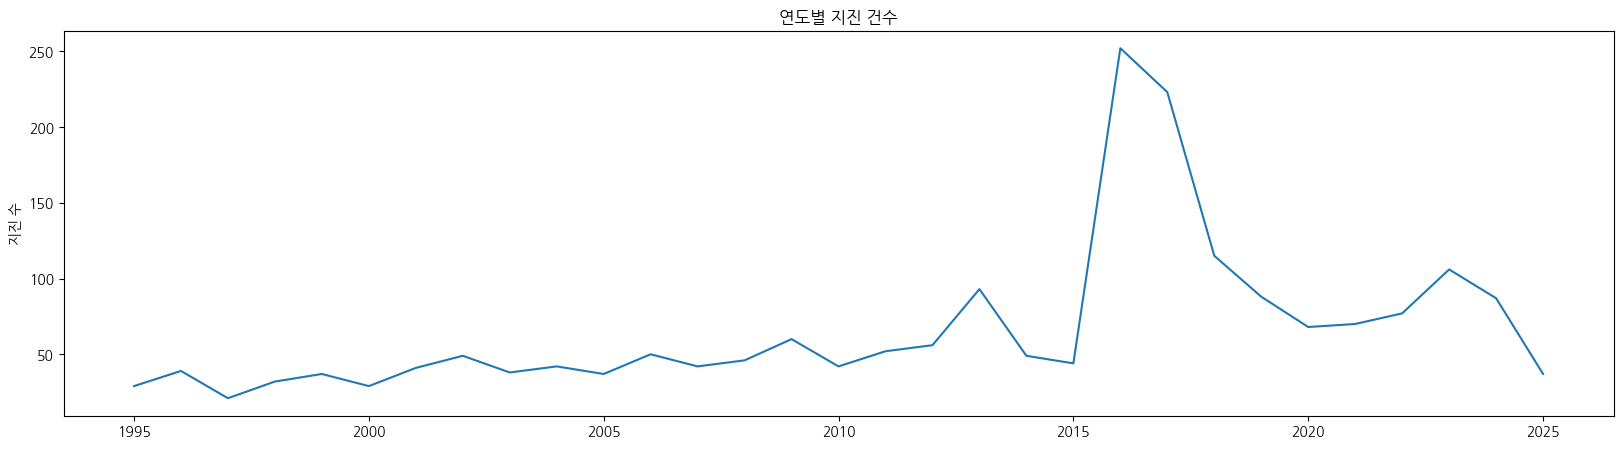

In [ ]:
#Ïó∞ÎèÑÎ≥Ñ ÏßÄÏßÑ Í±¥Ïàò
year_count = df['year'].value_counts().sort_index().reset_index()
plt.figure(figsize=(20,5))
plt.plot(year_count['year'],year_count['count'])
plt.title('Ïó∞ÎèÑÎ≥Ñ ÏßÄÏßÑ Í±¥Ïàò')
plt.xlabel(' ')
plt.ylabel('ÏßÄÏßÑ Ïàò')
plt.show()

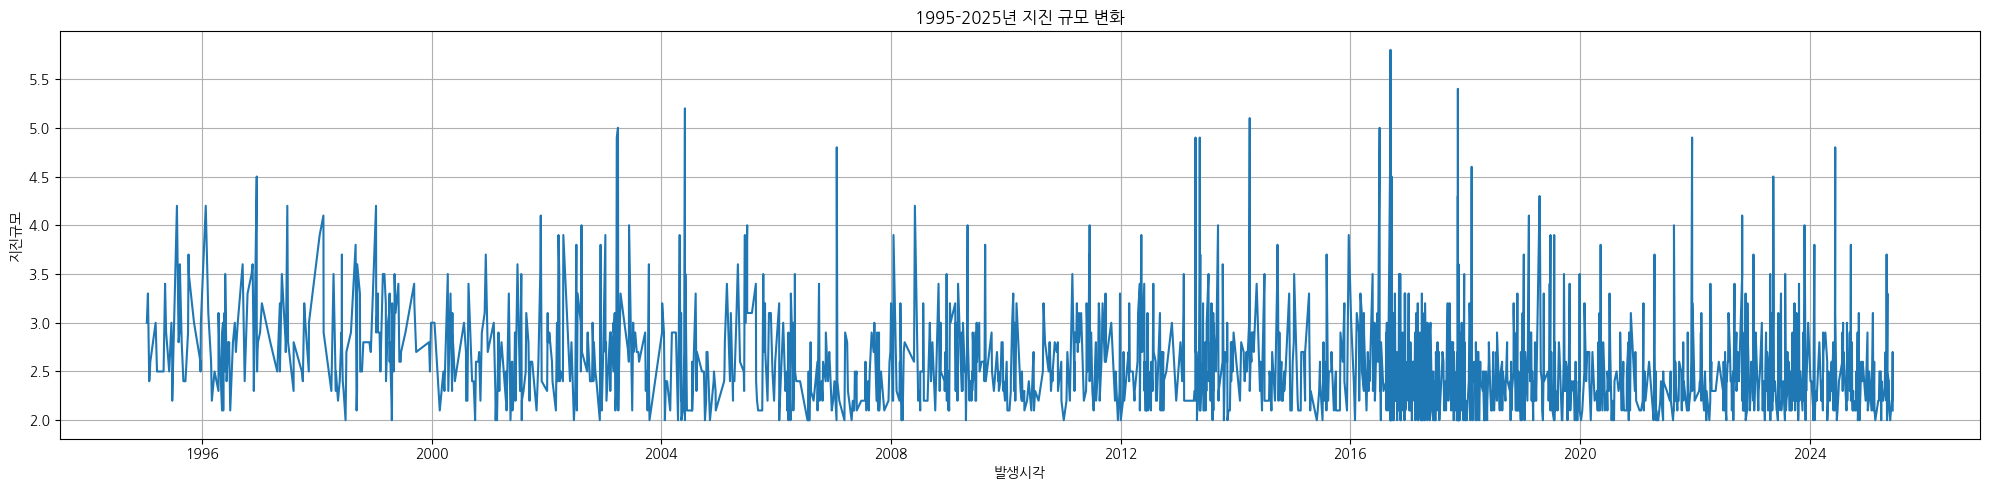

In [ ]:
#ÎÇ†ÏßúÎ≥Ñ ÏßÄÏßÑ Í∑úÎ™® Ï∂îÏù¥
plt.figure(figsize=(20,5))
plt.plot(df['Î∞úÏÉùÏãúÍ∞Å'], df['Í∑úÎ™®'], linestyle='-')
plt.title('1995-2025ÎÖÑ ÏßÄÏßÑ Í∑úÎ™® Î≥ÄÌôî')
plt.xlabel('Î∞úÏÉùÏãúÍ∞Å')
plt.ylabel('ÏßÄÏßÑÍ∑úÎ™®')
plt.grid(True)
plt.tight_layout()
plt.show()

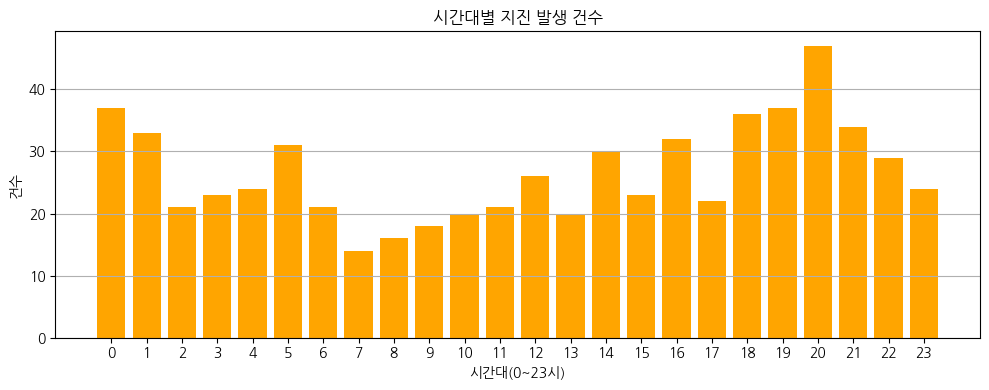

In [ ]:
#ÏãúÍ∞ÑÎåÄÎ≥Ñ ÏßÄÏßÑ Î∞úÏÉù Ï∂îÏù¥
hour_count = df_gyeong['hour'].value_counts().sort_index()

# ÏãúÍ∞ÅÌôî (ÎßâÎåÄÍ∑∏ÎûòÌîÑ)
plt.figure(figsize=(10, 4))
plt.bar(hour_count.index, hour_count.values, color='orange')
plt.title('ÏãúÍ∞ÑÎåÄÎ≥Ñ ÏßÄÏßÑ Î∞úÏÉù Í±¥Ïàò')
plt.xlabel('ÏãúÍ∞ÑÎåÄ(0~23Ïãú)')
plt.ylabel('Í±¥Ïàò')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

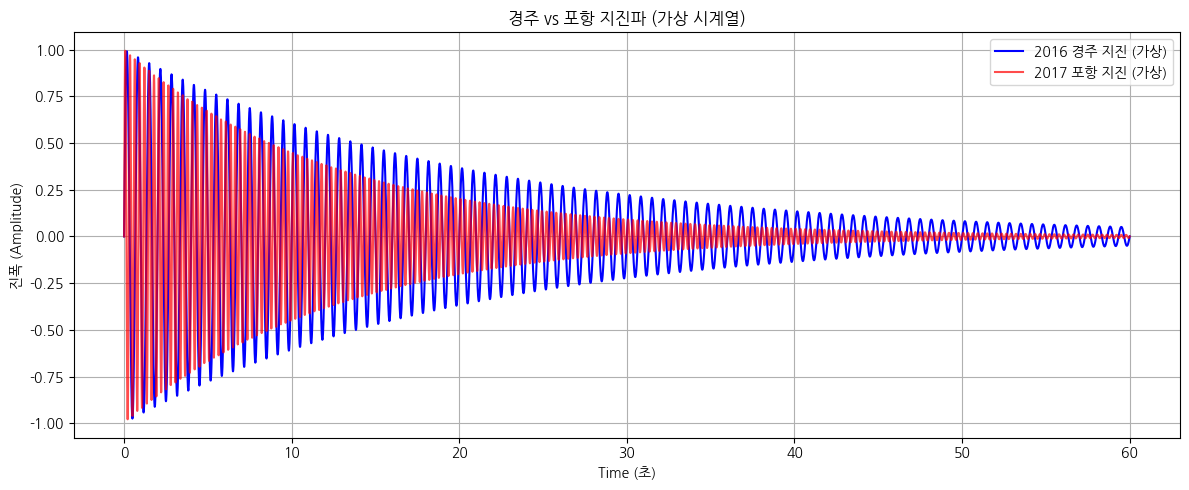

In [ ]:
# ÏãúÍ∞ÑÏ∂ï: 0~60Ï¥à, 0.01Ï¥à Í∞ÑÍ≤©
t = np.linspace(0, 60, 6000)

# Í≤ΩÏ£º ÏßÄÏßÑ: ÎÇÆÏùÄ ÏßÑÌè≠, ÏôÑÎßåÌïú Í∞êÏá†
gyeongju_wave = np.sin(2 * np.pi * 1.5 * t) * np.exp(-0.05 * t)

# Ìè¨Ìï≠ ÏßÄÏßÑ: ÎÜíÏùÄ ÏßÑÌè≠, Îπ†Î•¥Í≤å ÏßÑÎèôÌïòÍ≥† Í∞êÏá†
pohang_wave = np.sin(2 * np.pi * 3.5 * t) * np.exp(-0.08 * t)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 5))
plt.plot(t, gyeongju_wave, label='2016 Í≤ΩÏ£º ÏßÄÏßÑ (Í∞ÄÏÉÅ)', color='blue')
plt.plot(t, pohang_wave, label='2017 Ìè¨Ìï≠ ÏßÄÏßÑ (Í∞ÄÏÉÅ)', color='red', alpha=0.7)
plt.title('Í≤ΩÏ£º vs Ìè¨Ìï≠ ÏßÄÏßÑÌåå (Í∞ÄÏÉÅ ÏãúÍ≥ÑÏó¥)')
plt.xlabel('Time (Ï¥à)')
plt.ylabel('ÏßÑÌè≠ (Amplitude)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

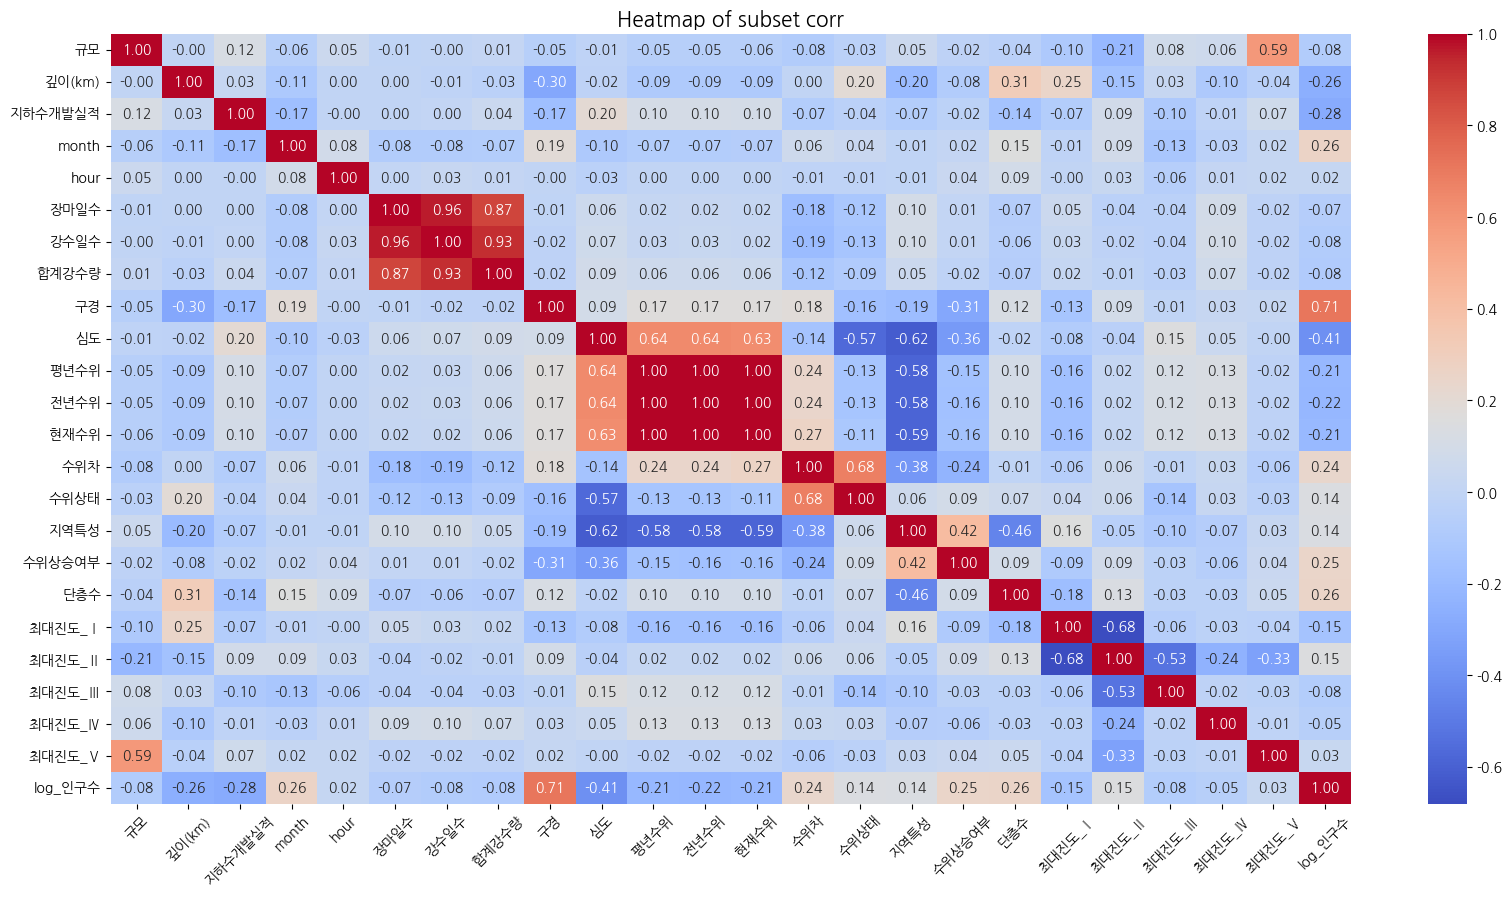

In [ ]:
#seabornÏùÑ Ïù¥Ïö©Ìïú heatmap ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌååÏïÖ
map = map_dx[['Í∑úÎ™®','ÍπäÏù¥(km)','ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å','month','hour','Ïû•ÎßàÏùºÏàò','Í∞ïÏàòÏùºÏàò','Ìï©Í≥ÑÍ∞ïÏàòÎüâ','Íµ¨Í≤Ω','Ïã¨ÎèÑ','ÌèâÎÖÑÏàòÏúÑ','Ï†ÑÎÖÑÏàòÏúÑ','ÌòÑÏû¨ÏàòÏúÑ','ÏàòÏúÑÏ∞®','ÏàòÏúÑÏÉÅÌÉú','ÏßÄÏó≠ÌäπÏÑ±','ÏàòÏúÑÏÉÅÏäπÏó¨Î∂Ä','Îã®Ï∏µÏàò','ÏµúÎåÄÏßÑÎèÑ_‚Ö†','ÏµúÎåÄÏßÑÎèÑ_‚Ö°',
             'ÏµúÎåÄÏßÑÎèÑ_‚Ö¢','ÏµúÎåÄÏßÑÎèÑ_‚Ö£','ÏµúÎåÄÏßÑÎèÑ_‚Ö§','log_Ïù∏Íµ¨Ïàò']]
corr_matrix = map.corr()

# ÌòÑÏû¨ ÌôîÎ©¥Ïùò ÌÅ¨Í∏∞Î•º Í∞ÄÏ†∏Ïò§Í∏∞
plt.rc('font', family='NanumGothic')
fig, ax = plt.subplots(figsize=(20, 10))  # Ï†ÅÏ†àÌïú Í∞íÏùÑ ÏÑ†ÌÉù

# ÌûàÌä∏Îßµ Í∑∏Î¶¨Í∏∞
sns.heatmap(data=corr_matrix, cmap='coolwarm', cbar=True, annot=True, fmt='.2f', ax=ax)
plt.title('Heatmap of subset corr', fontsize=15)
plt.xticks(rotation=45)
plt.show()

- ## 3-2) Îç∞Ïù¥ÌÑ∞ ÌôïÎ•†Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî

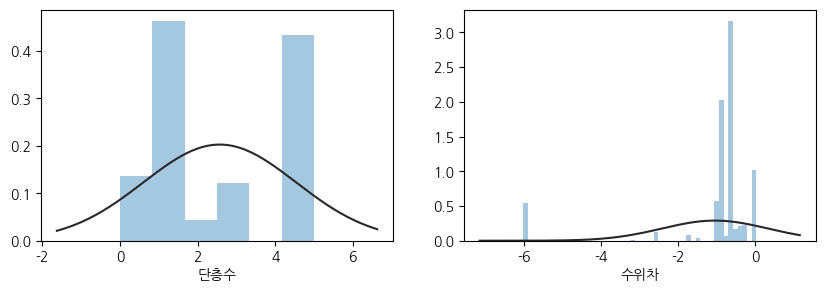

In [ ]:
#Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨
import scipy as sp
import scipy.stats

f,ax=plt.subplots(1,2, figsize=(10,3))

#Ï†ïÍ∑úÎ∂ÑÌè¨
before= map['Îã®Ï∏µÏàò']
sns.distplot(before, kde=False, rug=False, fit=sp.stats.norm, ax = ax[0])

before= map['ÏàòÏúÑÏ∞®']
sns.distplot(before, kde=False, rug=False, fit=sp.stats.norm, ax = ax[1])
plt.show()

# 4) OLS ÌöåÍ∑ÄÎ∂ÑÏÑù Î∞è Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌååÏïÖ

> ## 4-1) Íµ≠ÎÇ¥ Ïã±ÌÅ¨ÌôÄ Îç∞Ïù¥ÌÑ∞ Ï∂îÍ∞Ä





In [ ]:
sinkhole = pd.read_excel('/content/drive/MyDrive/·Ñå·Öµ·Ñå·Öµ·Ü´·ÑÄ·Ö©·Üº·ÑÜ·Ö©·Ñå·Ö•·Ü´/sinkhole.xlsx')
sinkhole.rename(columns={'ÎÖÑÎèÑ':'year', 'Ïõî':'month'}, inplace=True)
sinkhole.drop(columns={'Ìï©Í≥Ñ'}, inplace=True)

In [ ]:
sinkhole = sinkhole.melt(id_vars=['year','month'], var_name='ÌñâÏ†ïÍµ¨', value_name='Ïã±ÌÅ¨ÌôÄÏàò')
sinkhole['Ïã±ÌÅ¨ÌôÄÏàò'] = pd.to_numeric(sinkhole['Ïã±ÌÅ¨ÌôÄÏàò'], errors='coerce')
sinkhole=sinkhole[sinkhole['ÌñâÏ†ïÍµ¨']=='Í≤ΩÎ∂Å']

In [ ]:
sinkhole.head()

year  month ÌñâÏ†ïÍµ¨  Ïã±ÌÅ¨ÌôÄÏàò
1176  2018      1  Í≤ΩÎ∂Å     0
1177  2018      2  Í≤ΩÎ∂Å     0
1178  2018      3  Í≤ΩÎ∂Å     1
1179  2018      4  Í≤ΩÎ∂Å     2
1180  2018      5  Í≤ΩÎ∂Å     4

In [ ]:
df_gb = df_gb.merge(sinkhole[['year','month','Ïã±ÌÅ¨ÌôÄÏàò']], on=['year','month'], how='left')

In [ ]:
df_gb.drop(columns={'Ïã±ÌÅ¨ÌôÄÏàò_x','Ïã±ÌÅ¨ÌôÄÏàò_y'}, inplace=True)

In [ ]:
df_gb['Ïã±ÌÅ¨ÌôÄÏàò'] = df_gb['Ïã±ÌÅ¨ÌôÄÏàò'].fillna(0)
df_gb['Ïã±ÌÅ¨ÌôÄÏàò'] = df_gb['Ïã±ÌÅ¨ÌôÄÏàò'].astype(int)

In [ ]:
scale_cols = ['Ïã±ÌÅ¨ÌôÄÏàò']
scaler = StandardScaler()
df_gb[scale_cols] = scaler.fit_transform(df_gb[scale_cols])
df_gb

Í∑úÎ™®    ÍπäÏù¥(km)  year  month ÌñâÏ†ïÍµ¨  ÏßÄÏó≠   ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å  day  hour   day_week  ...  \
0    2.4 -0.264562  2025      5  Í≤ΩÎ∂Å  ÍπÄÏ≤ú -2.679928   19    14     Monday  ...   
1    2.5  0.470460  2025      5  Í≤ΩÎ∂Å  Í≤ΩÏ£º -2.679928    7    23  Wednesday  ...   
2    2.0  0.225453  2025      5  Í≤ΩÎ∂Å  Í≤ΩÏ£º -2.679928    7    19  Wednesday  ...   
3    2.0 -0.264562  2024     11  Í≤ΩÎ∂Å  ÏòÅÎçï  0.316191    3    12     Sunday  ...   
4    2.5 -1.489598  2024     10  Í≤ΩÎ∂Å  Ïπ†Í≥°  0.316191   23    17  Wednesday  ...   
..   ...       ...   ...    ...  ..  ..       ...  ...   ...        ...  ...   
634  2.6 -0.019555  1995     12  Í≤ΩÎ∂Å  ÏÉÅÏ£º -2.679928   21     8   Thursday  ...   
635  2.9 -0.019555  1995     10  Í≤ΩÎ∂Å  Ïö∏ÏßÑ -2.679928    3    14    Tuesday  ...   
636  2.2 -0.019555  1995      6  Í≤ΩÎ∂Å  Ïö∏ÏßÑ -2.679928   24    21   Saturday  ...   
637  2.6 -0.019555  1995      6  Í≤ΩÎ∂Å  Ïö∏ÏßÑ -2.679928   24    19   Saturday  ...   
638  3.0 -0.019555  1995      6  Í≤ΩÎ∂Å  ÏÉÅÏ£º -2.679928   19    18     Monday  ...   

           Íµ¨Í≤Ω        Ïã¨ÎèÑ    ÌèâÎÖÑÏàòÏúÑ       ÏàòÏúÑÏ∞®  ÏàòÏúÑÏÉÅÌÉú  ÏßÄÏó≠ÌäπÏÑ±  ÏàòÏúÑÏÉÅÏäπÏó¨Î∂Ä       Îã®Ï∏µÏàò  ÏµúÎåÄÏßÑÎèÑ  \
0   -0.273901  1.404460  103.84  0.000888     0     0       1 -1.306600     3   
1    0.049135 -0.101353   87.47  0.262697     1     0       1  1.234232     3   
2    0.049135 -0.101353   87.47  0.262697     1     0       1  1.234232     2   
3   -0.677877  0.596042   58.35  0.706319     1     0       0 -0.798433     1   
4   -0.435539  0.531914   78.09  0.051795     1     0       1 -1.306600     4   
..        ...       ...     ...       ...   ...   ...     ...       ...   ...   
634  1.399195 -0.068087  137.59  0.691774     1     0       0  0.217899     2   
635 -0.677877  0.756363   43.37 -3.620810     0     1       1  0.217899     2   
636 -0.677877  0.756363   43.37 -3.620810     0     1       1  0.217899     2   
637 -0.677877  0.756363   43.37 -3.620810     0     1       1  0.217899     2   
638  1.399195 -0.068087  137.59  0.691774     1     0       0  0.217899     2   

         Ïã±ÌÅ¨ÌôÄÏàò  
0   -0.232147  
1   -0.232147  
2   -0.232147  
3   -0.232147  
4   -0.232147  
..        ...  
634 -0.232147  
635 -0.232147  
636 -0.232147  
637 -0.232147  
638 -0.232147  

[639 rows x 24 columns]

In [ ]:
target = df_gb['Í∑úÎ™®']
x_data = df_gb.drop(['Í∑úÎ™®','ÌñâÏ†ïÍµ¨','ÏßÄÏó≠','day_week','year','ÏàòÏúÑÏÉÅÏäπÏó¨Î∂Ä','ÏàòÏúÑÏÉÅÌÉú','Ïû•ÎßàÏùºÏàò'], axis=1)

In [ ]:
#OLS ÌöåÍ∑ÄÎ∂ÑÏÑù

#ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä
df_x_ = sm.add_constant(x_data, has_constant= "add")

#ÌöåÍ∑ÄÎ™®Îç∏ Ï†ÅÌï©
model = sm.OLS(target, df_x_)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Í∑úÎ™®   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     18.32
Date:                Mon, 07 Jul 2025   Prob (F-statistic):           1.60e-42
Time:                        06:55:46   Log-Likelihood:                -333.38
No. Observations:                 639   AIC:                             700.8
Df Residuals:                     622   BIC:                             776.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3506      0.095     14.175      0.000       1.163       1.538
ÍπäÏù¥(km)         0.0553      0.020      2.765      0.006       0.016       0.095
month          0.0006      0.005      0.117      0.907      -0.010       0.011
ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å        0.0399      0.017      2.286      0.023       0.006       0.074
day            0.0008      0.002      0.360      0.719      -0.004       0.005
hour           0.0043      0.002      1.886      0.060      -0.000       0.009
Ïù∏Íµ¨Ïàò           -0.0857      0.042     -2.047      0.041      -0.168      -0.003
Í∞ïÏàòÏùºÏàò          -0.0696      0.047     -1.494      0.136      -0.161       0.022
Ìï©Í≥ÑÍ∞ïÏàòÎüâ          0.0667      0.046      1.449      0.148      -0.024       0.157
Íµ¨Í≤Ω             0.0532      0.032      1.667      0.096      -0.009       0.116
Ïã¨ÎèÑ            -0.0395      0.038     -1.040      0.299      -0.114       0.035
ÌèâÎÖÑÏàòÏúÑ          -0.0514      0.025     -2.032      0.043      -0.101      -0.002
ÏàòÏúÑÏ∞®           -0.0104      0.032     -0.328      0.743      -0.073       0.052
ÏßÄÏó≠ÌäπÏÑ±           0.0798      0.095      0.841      0.401      -0.107       0.266
Îã®Ï∏µÏàò           -0.0469      0.028     -1.657      0.098      -0.103       0.009
ÏµúÎåÄÏßÑÎèÑ           0.4996      0.031     16.018      0.000       0.438       0.561
Ïã±ÌÅ¨ÌôÄÏàò          -0.0053      0.021     -0.255      0.799      -0.046       0.035
==============================================================================
Omnibus:                      105.994   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.710
Skew:                           1.060   Prob(JB):                     2.32e-37
Kurtosis:                       4.357   Cond. No.                         161.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#ÏµúÎåÄÏßÑÎèÑ ÏõêÌï´Ïù∏ÏΩîÎî©ÏóêÏÑú ÎùºÎ≤®ÎßÅ Î≤îÏ£ºÎ°ú Îã§Ïãú ÏõêÎ≥µÌïòÍ∏∞
df_gb['ÏµúÎåÄÏßÑÎèÑ'] = (
    df_gb['ÏµúÎåÄÏßÑÎèÑ_‚Ö†'] * 1 +
    df_gb['ÏµúÎåÄÏßÑÎèÑ_‚Ö°'] * 2 +
    df_gb['ÏµúÎåÄÏßÑÎèÑ_‚Ö¢'] * 3 +
    df_gb['ÏµúÎåÄÏßÑÎèÑ_‚Ö£'] * 4 +
    df_gb['ÏµúÎåÄÏßÑÎèÑ_‚Ö§'] * 5
)

In [ ]:
df_gb.drop(columns={'ÏµúÎåÄÏßÑÎèÑ_‚Ö†','ÏµúÎåÄÏßÑÎèÑ_‚Ö°','ÏµúÎåÄÏßÑÎèÑ_‚Ö¢','ÏµúÎåÄÏßÑÎèÑ_‚Ö£','ÏµúÎåÄÏßÑÎèÑ_‚Ö§'}, inplace=True)

In [ ]:
#Îã§Ï§ëÍ≥µÏÑ†ÏÑ± VIF Ïó¨Î∂Ä ÌôïÏù∏
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['vif factor'] = [variance_inflation_factor(
    x_data.values, i) for i in range(x_data.shape[1])]
vif["features"] = x_data.columns
vif = vif.sort_values("vif factor").reset_index(drop=True)
vif

vif factor features
0     1.141044  ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å
1     1.141463     Ïã±ÌÅ¨ÌôÄÏàò
2     1.443981   ÍπäÏù¥(km)
3     2.380959     ÌèâÎÖÑÏàòÏúÑ
4     2.953298      Îã®Ï∏µÏàò
5     3.475216      ÏàòÏúÑÏ∞®
6     3.563501     hour
7     3.756384       Íµ¨Í≤Ω
8     4.772955      day
9     5.213877       Ïã¨ÎèÑ
10    5.614098    month
11    6.340064      Ïù∏Íµ¨Ïàò
12    7.922703    Ìï©Í≥ÑÍ∞ïÏàòÎüâ
13    8.099730     Í∞ïÏàòÏùºÏàò
14    8.140513     ÏµúÎåÄÏßÑÎèÑ
15   11.991987     ÏßÄÏó≠ÌäπÏÑ±



> ## 4-2) hour/month/day ÏãúÍ≥ÑÏó¥ Î≥ÄÏàò ÏΩîÏÇ¨Ïù∏ Î≥ÄÌôò



In [ ]:
#ÏãúÍ∞ÑÎ≥ÄÏàò ÏÇ¨Ïù∏/ÏΩîÏÇ¨Ïù∏ Î≥ÄÌôòÌï¥ÏÑú Ï£ºÍ∏∞ÏÑ± Ìå®ÌÑ¥ÏùÑ Î≥¥Ï°¥ÌïòÍ∏∞
# ÏöîÏùº Ïà´Ïûê Îß§Ìïë
day_map = {'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}
df_gb['day_num'] = df_gb['day_week'].map(day_map)

In [ ]:
# ‚úÖ ÏöîÏùº ÏÇ¨Ïù∏/ÏΩîÏÇ¨Ïù∏
df_gb['day_sin'] = np.sin(2 * np.pi * df_gb['day_num'] / 7)
df_gb['day_cos'] = np.cos(2 * np.pi * df_gb['day_num'] / 7)

# ‚úÖ ÏãúÍ∞Ñ
df_gb['hour_sin'] = np.sin(2 * np.pi * df_gb['hour'] / 24)
df_gb['hour_cos'] = np.cos(2 * np.pi * df_gb['hour'] / 24)

# ‚úÖ Ïõî (0Î∂ÄÌÑ∞ ÏãúÏûë)
df_gb['month_sin'] = np.sin(2 * np.pi * (df_gb['month'] - 1) / 12)
df_gb['month_cos'] = np.cos(2 * np.pi * (df_gb['month'] - 1) / 12)

In [ ]:
df_gb.drop(columns={'month','hour','day','day_num'}, inplace=True)

# 5) Ridge regression Î∂ÑÏÑùÏùÑ ÌÜµÌïú ÏßÄÏßÑ Í∑úÎ™®Ïóê ÏòÅÌñ•ÏùÑ Ï£ºÎäî Ïú†ÏùòÎØ∏Ìïú Î≥ÄÏàò ÌååÏïÖ

In [ ]:
#Î¶¨ÏßÄ ÌöåÍ∑ÄÎ•º ÌÜµÌïú ÏßÑÏßú Ïú†ÏùòÎØ∏Ìïú Î≥ÄÏàò ÌååÏïÖ
#!pip install mglearn
from sklearn.linear_model import RidgeCV

# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
x = df_gb.drop(columns=['Í∑úÎ™®', 'ÌñâÏ†ïÍµ¨', 'ÏßÄÏó≠', 'day_week'])
y = df_gb['Í∑úÎ™®']

# 2. Ridge ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ (ÍµêÏ∞®Í≤ÄÏ¶ù Ìè¨Ìï®)
ridge = RidgeCV(cv=5)
ridge.fit(x, y)

# 3. Í≥ÑÏàò Ï∂îÏ∂ú Î∞è Ï†ïÎ†¨
ridge_coef = pd.Series(ridge.coef_, index=x.columns)
ridge_coef_sorted = ridge_coef.sort_values(key=abs, ascending=False)

# 4. Í≤∞Í≥º Ï∂úÎ†•
print("üîé Ridge ÌöåÍ∑Ä Î≥ÄÏàò ÏòÅÌñ•Î†• ÏàúÏúÑ:")
print(ridge_coef_sorted)

üîé Ridge ÌöåÍ∑Ä Î≥ÄÏàò ÏòÅÌñ•Î†• ÏàúÏúÑ:
ÏµúÎåÄÏßÑÎèÑ         0.476909
Í∞ïÏàòÏùºÏàò        -0.109624
ÏàòÏúÑÏÉÅÏäπÏó¨Î∂Ä      -0.095869
Ìï©Í≥ÑÍ∞ïÏàòÎüâ        0.058899
hour_cos    -0.050879
ÍπäÏù¥(km)       0.048005
day_cos      0.046637
Ïã¨ÎèÑ          -0.044235
hour_sin    -0.037175
Îã®Ï∏µÏàò         -0.035877
ÌèâÎÖÑÏàòÏúÑ        -0.033304
ÏßÄÏó≠ÌäπÏÑ±         0.032860
ÏàòÏúÑÏ∞®         -0.021782
month_sin   -0.017453
year        -0.015168
Ïã±ÌÅ¨ÌôÄÏàò         0.014108
ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å      0.014003
Ïù∏Íµ¨Ïàò         -0.012996
day_sin     -0.011133
month_cos   -0.009557
Ïû•ÎßàÏùºÏàò         0.008838
ÏàòÏúÑÏÉÅÌÉú        -0.007509
Íµ¨Í≤Ω           0.007396
dtype: float64


# 6) ÏßÄÏó≠Î≥Ñ ÏßÄÏßÑ ÏúÑÌóòÎèÑ Ï∂îÏ†ïÏùÑ ÏúÑÌïú Î™®Îç∏ ÌïôÏäµ

> ## 6-1) Logistic Regression



In [ ]:
df_gb = pd.read_excel('/content/drive/MyDrive/·Ñå·Öµ·Ñå·Öµ·Ü´·ÑÄ·Ö©·Üº·ÑÜ·Ö©·Ñå·Ö•·Ü´/df_all.xlsx')

In [ ]:
df_gb

Í∑úÎ™®    ÍπäÏù¥(km)  year ÌñâÏ†ïÍµ¨  ÏßÄÏó≠   ÏßÄÌïòÏàòÍ∞úÎ∞úÏã§Ï†Å   day_week       Ïù∏Íµ¨Ïàò  Ïû•ÎßàÏùºÏàò  \
0    2.4 -0.264562  2025  Í≤ΩÎ∂Å  ÍπÄÏ≤ú -2.679928     Monday -0.606241     0   
1    2.5  0.470460  2025  Í≤ΩÎ∂Å  Í≤ΩÏ£º -2.679928  Wednesday  0.044973     0   
2    2.0  0.225453  2025  Í≤ΩÎ∂Å  Í≤ΩÏ£º -2.679928  Wednesday  0.044973     0   
3    2.0 -0.264562  2024  Í≤ΩÎ∂Å  ÏòÅÎçï  0.316191     Sunday -1.213776     0   
4    2.5 -1.489598  2024  Í≤ΩÎ∂Å  Ïπ†Í≥°  0.316191  Wednesday -0.778437     0   
..   ...       ...   ...  ..  ..       ...        ...       ...   ...   
634  2.6 -0.019555  1995  Í≤ΩÎ∂Å  ÏÉÅÏ£º -2.679928   Thursday -0.867990     0   
635  2.9 -0.019555  1995  Í≤ΩÎ∂Å  Ïö∏ÏßÑ -2.679928    Tuesday -1.136310     0   
636  2.2 -0.019555  1995  Í≤ΩÎ∂Å  Ïö∏ÏßÑ -2.679928   Saturday -1.136310    28   
637  2.6 -0.019555  1995  Í≤ΩÎ∂Å  Ïö∏ÏßÑ -2.679928   Saturday -1.136310    28   
638  3.0 -0.019555  1995  Í≤ΩÎ∂Å  ÏÉÅÏ£º -2.679928     Monday -0.867990     0   

         Í∞ïÏàòÏùºÏàò  ...  ÏàòÏúÑÏÉÅÏäπÏó¨Î∂Ä       Îã®Ï∏µÏàò  ÏµúÎåÄÏßÑÎèÑ      Ïã±ÌÅ¨ÌôÄÏàò   day_sin   day_cos  \
0   -0.166683  ...       1 -1.306600     3 -0.232147  0.000000  1.000000   
1   -0.166683  ...       1  1.234232     3 -0.232147  0.974928 -0.222521   
2   -0.166683  ...       1  1.234232     2 -0.232147  0.974928 -0.222521   
3   -0.166683  ...       0 -0.798433     1 -0.232147 -0.781831  0.623490   
4   -0.166683  ...       1 -1.306600     4 -0.232147  0.974928 -0.222521   
..        ...  ...     ...       ...   ...       ...       ...       ...   
634 -0.166683  ...       0  0.217899     2 -0.232147  0.433884 -0.900969   
635 -0.166683  ...       1  0.217899     2 -0.232147  0.781831  0.623490   
636  5.236006  ...       1  0.217899     2 -0.232147 -0.974928 -0.222521   
637  5.236006  ...       1  0.217899     2 -0.232147 -0.974928 -0.222521   
638 -0.166683  ...       0  0.217899     2 -0.232147  0.000000  1.000000   

         hour_sin      hour_cos  month_sin     month_cos  
0   -5.000000e-01 -8.660254e-01   0.866025 -5.000000e-01  
1   -2.588190e-01  9.659258e-01   0.866025 -5.000000e-01  
2   -9.659258e-01  2.588190e-01   0.866025 -5.000000e-01  
3    1.224647e-16 -1.000000e+00  -0.866025  5.000000e-01  
4   -9.659258e-01 -2.588190e-01  -1.000000 -1.836970e-16  
..            ...           ...        ...           ...  
634  8.660254e-01 -5.000000e-01  -0.500000  8.660254e-01  
635 -5.000000e-01 -8.660254e-01  -1.000000 -1.836970e-16  
636 -7.071068e-01  7.071068e-01   0.500000 -8.660254e-01  
637 -9.659258e-01  2.588190e-01   0.500000 -8.660254e-01  
638 -1.000000e+00 -1.836970e-16   0.500000 -8.660254e-01  

[639 rows x 27 columns]

In [ ]:
#Î™®Îç∏ ÌïôÏäµ(Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä + ÌôïÎ•† Í∏∞Î∞ò ÏúÑÌóòÎèÑ Ï∂îÏ†ï)
from sklearn.linear_model import LogisticRegression
import numpy as np

#Î∂àÌïÑÏöîÌïú Ïó¥ Ï†úÍ±∞ Î∞è ÎçîÎØ∏ Ïù∏ÏΩîÎî©
drop_cols = ['year','ÌñâÏ†ïÍµ¨', 'day_week']
X = df_gb.drop(columns=drop_cols)
X = pd.get_dummies(X, columns=['ÏßÄÏó≠'], drop_first=False)

In [ ]:
#ÏùòÏÇ¨ ÌÉÄÍ≤ü ÏÉùÏÑ±
y_fake = np.random.choice([0,1], size=len(X))

#ÏßÄÏó≠Î≥Ñ Î∞úÏÉù Í±¥Ïàò Í≥ÑÏÇ∞
region_counts = df_gb['ÏßÄÏó≠'].value_counts().to_dict()

#Í∞Å ÌñâÏóê Ìï¥Îãπ ÏßÄÏó≠Ïùò Î∞úÏÉù Í±¥Ïàò Í∞ÄÏ§ëÏπò Î∂ÄÏó¨
sample_weight = df_gb['ÏßÄÏó≠'].map(region_counts)

In [ ]:
#Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ
model = LogisticRegression(max_iter=1000)
model.fit(X, y_fake, sample_weight=sample_weight)

LogisticRegression(max_iter=1000)

In [ ]:
z = np.dot(X, model.coef_.flatten()) + model.intercept_[0]
z = np.array(z, dtype=np.float64)  # Î™ÖÏãúÏ†Å Î≥ÄÌôò
df_gb['risk_score'] = 1 / (1 + np.exp(-z))

In [ ]:
df_gb['risk_score_rank'] = df_gb['risk_score'].rank(pct=True)
df_gb[['risk_score','risk_score_rank']]

risk_score  risk_score_rank
0      0.487706         0.522692
1      0.504054         0.568075
2      0.700007         0.893584
3      0.698073         0.892019
4      0.055425         0.020344
..          ...              ...
634    0.321700         0.150235
635    0.496945         0.541471
636    0.727903         0.915493
637    0.713738         0.906103
638    0.584210         0.771518

[639 rows x 2 columns]

In [ ]:
#ÏßÄÏó≠Ïù¥Î¶Ñ Î≥µÏõê: ÎçîÎØ∏ Î≥ÄÏàòÏóêÏÑú Ï∂îÏ∂ú
region_cols = [col for col in X.columns if col.startswith("ÏßÄÏó≠_")]
region_df = X[region_cols].copy()
df_gb['ÏßÄÏó≠'] = region_df.idxmax(axis=1).str.replace("ÏßÄÏó≠_","")

#ÏßÄÏó≠Î≥Ñ ÌèâÍ∑† ÏúÑÌóòÎèÑ Í≥ÑÏÇ∞
region_risk = df_gb.groupby('ÏßÄÏó≠')[['risk_score','risk_score_rank']].mean().reset_index().sort_values(by='risk_score', ascending=False)

In [ ]:
region_risk.head(10)

ÏßÄÏó≠  risk_score  risk_score_rank
8   ÏÑ±Ï£º    0.763234         0.924622
6   Î¥âÌôî    0.762424         0.929577
17  ÏùòÏÑ±    0.758160         0.902750
11  ÏòÅÏñë    0.716454         0.866197
10  ÏòÅÎçï    0.658470         0.789530
19  Ï≤≠ÏÜ°    0.600466         0.728743
15  Ïö∏Î¶â    0.584025         0.681794
0   Í≤ΩÏ£º    0.510812         0.591197
14  ÏòàÏ≤ú    0.508313         0.545607
9   ÏïàÎèô    0.494294         0.570129

In [ ]:
#Î≥ÄÏàòÎ≥Ñ Í∏∞Ïó¨ÎèÑ Í≥ÑÏÇ∞
coef = model.coef_.flatten()
contributions = X * coef
contributions['ÏßÄÏó≠'] = df_gb['ÏßÄÏó≠'].values

In [ ]:
#ÏßÄÏó≠Î≥Ñ ÌèâÍ∑† Í∏∞Ïó¨ÎèÑ Í≥ÑÏÇ∞
rc = contributions.groupby('ÏßÄÏó≠').mean()
rc = rc.loc[:, ~rc.columns.str.startswith("ÏßÄÏó≠_")]

#ÏßÄÏó≠Î≥Ñ Ï£ºÏöî Î≥ÄÏàò ÏÉÅÏúÑ 5Í∞ú Ï∂îÏ∂ú
top = {}

for region in rc.index:
  region_contrib = rc.loc[region]
  top_vars = region_contrib.abs().sort_values(ascending=False).head(5)
  top[region] = region_contrib[top_vars.index]

In [ ]:
#ÏßÄÏó≠Î≥Ñ ÏúÑÌóòÎèÑ Ï†êÏàòÏóê Í∞ÄÏû• ÏòÅÌñ•ÏùÑ ÎßéÏù¥ Ï§Ä ÏÉÅÏúÑ Î≥ÄÏàò 5Í∞ú
top_df = pd.DataFrame(top).T
top_df

Íµ¨Í≤Ω        Í∑úÎ™®       Îã®Ï∏µÏàò    ÏàòÏúÑÏÉÅÏäπÏó¨Î∂Ä       ÏàòÏúÑÏ∞®       Ïù∏Íµ¨Ïàò      ÏßÄÏó≠ÌäπÏÑ±  \
Í≤ΩÏ£º       NaN -0.588625  0.435105  0.547776       NaN       NaN       NaN   
Í≥†Î†π       NaN -0.683543 -0.460617  0.547776       NaN  0.928913       NaN   
Íµ¨ÎØ∏       NaN -0.643097 -0.460617  0.547776       NaN -0.748101       NaN   
Íµ∞ÏúÑ -1.362913       NaN       NaN  1.095552       NaN  0.957625  1.110233   
ÍπÄÏ≤ú       NaN -0.588494 -0.460617  0.547776       NaN       NaN       NaN   
Î¨∏Í≤Ω       NaN -0.608428       NaN  0.547776       NaN  0.765282       NaN   
Î¥âÌôî       NaN -0.577574       NaN  0.547776       NaN  0.935029       NaN   
ÏÉÅÏ£º  0.343671 -0.628853       NaN       NaN       NaN  0.654391       NaN   
ÏÑ±Ï£º       NaN -0.562204       NaN  0.547776       NaN  0.878735       NaN   
ÏïàÎèô       NaN -0.605178       NaN  0.547776       NaN  0.372776       NaN   
ÏòÅÎçï       NaN -0.611274 -0.281472       NaN       NaN  0.915084       NaN   
ÏòÅÏñë       NaN -0.594561       NaN  0.547776       NaN  0.994638       NaN   
ÏòÅÏ£º       NaN -0.525802       NaN       NaN       NaN  0.623090       NaN   
ÏòÅÏ≤ú       NaN -0.606695       NaN  0.547776       NaN  0.627761       NaN   
ÏòàÏ≤ú       NaN -0.575494       NaN  0.547776       NaN  0.820082       NaN   
Ïö∏Î¶â -1.362913       NaN       NaN  1.095552       NaN  1.022749  1.110233   
Ïö∏ÏßÑ       NaN -0.639052       NaN       NaN -1.035469  0.856682  0.555116   
ÏùòÏÑ±       NaN -0.544292       NaN  0.547776       NaN  0.846070       NaN   
Ï≤≠ÎèÑ       NaN -0.612762       NaN  0.547776       NaN  0.882235       NaN   
Ï≤≠ÏÜ°       NaN -0.622874       NaN  0.547776       NaN  0.957405       NaN   
Ïπ†Í≥°       NaN -0.586472       NaN  0.547776       NaN  0.586876       NaN   
Ìè¨Ìï≠       NaN -0.593866       NaN  0.547776       NaN -1.136108  0.555116   

        ÏµúÎåÄÏßÑÎèÑ      ÌèâÎÖÑÏàòÏúÑ     Ìï©Í≥ÑÍ∞ïÏàòÎüâ  
Í≤ΩÏ£º -1.361800  0.580091       NaN  
Í≥†Î†π -1.294551       NaN       NaN  
Íµ¨ÎØ∏ -1.186672       NaN       NaN  
Íµ∞ÏúÑ -1.294551       NaN       NaN  
ÍπÄÏ≤ú -1.429400  0.688655       NaN  
Î¨∏Í≤Ω -1.294551  0.772416       NaN  
Î¥âÌôî -1.553461  2.181627       NaN  
ÏÉÅÏ£º -1.435263  0.912482       NaN  
ÏÑ±Ï£º -1.186672  0.771355       NaN  
ÏïàÎèô -1.456370  0.948029       NaN  
ÏòÅÎçï -1.160211  0.386971       NaN  
ÏòÅÏñë -1.456370  2.131954       NaN  
ÏòÅÏ£º -1.294551  1.348462  0.494792  
ÏòÅÏ≤ú -1.294551  0.752587       NaN  
ÏòàÏ≤ú -1.340785  0.793174       NaN  
Ïö∏Î¶â -1.078792       NaN       NaN  
Ïö∏ÏßÑ -1.325373       NaN       NaN  
ÏùòÏÑ± -1.387019  0.957380       NaN  
Ï≤≠ÎèÑ -1.456370  1.038687       NaN  
Ï≤≠ÏÜ° -1.294551  1.805665       NaN  
Ïπ†Í≥° -1.726068  0.517884       NaN  
Ìè¨Ìï≠ -1.273937       NaN       NaN

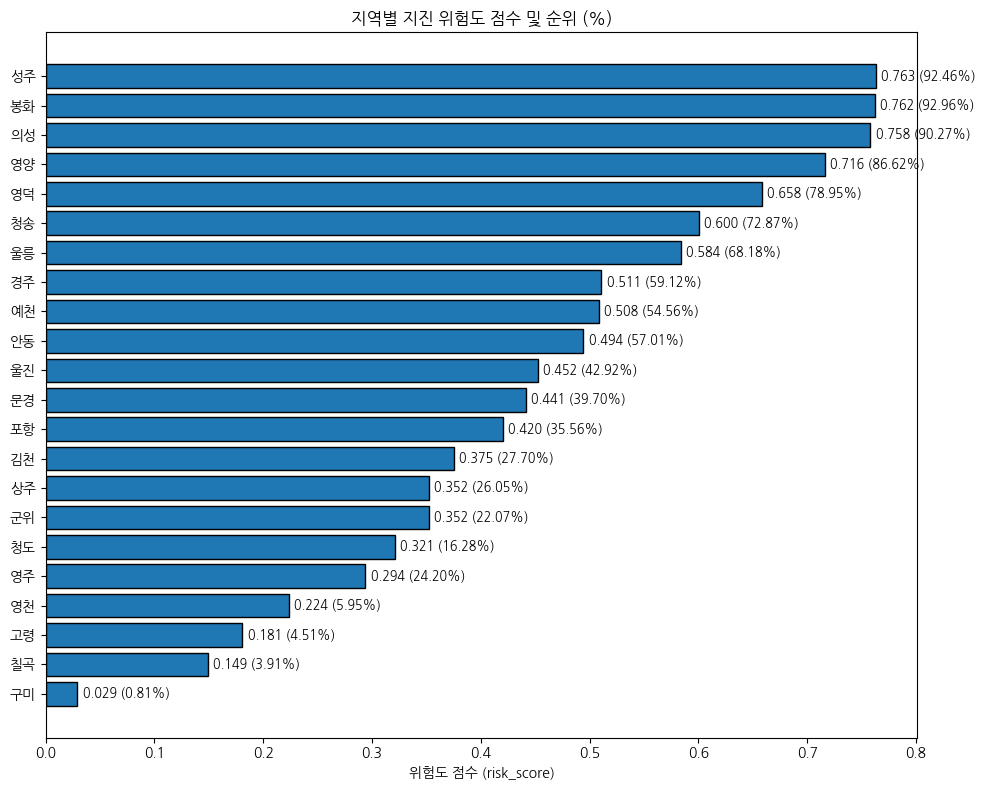

In [ ]:
# ÏúÑÌóòÎèÑ Ï†êÏàòÍ∞Ä ÎÜíÏùÄ Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨
plot_df = region_risk.sort_values(by='risk_score', ascending=True)

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
plt.figure(figsize=(10, 8))
bars = plt.barh(plot_df['ÏßÄÏó≠'], plot_df['risk_score'], edgecolor='black')

# Ï†êÏàòÏôÄ ÏàúÏúÑÎ•º Ìï®Íªò ÌÖçÏä§Ìä∏Î°ú ÌëúÍ∏∞
for bar, score, rank in zip(bars, plot_df['risk_score'], plot_df['risk_score_rank']):
    plt.text(score + 0.005,              # ÎßâÎåÄ Ïò§Î•∏Ï™Ω Ïó¨Î∞±
             bar.get_y() + bar.get_height() / 2,  # ÎßâÎåÄ ÏÑ∏Î°ú Í∞ÄÏö¥Îç∞
             f'{score:.3f} ({rank:.2%})',         # ÌëúÏãú: 0.715 (92.96%)
             va='center', fontsize=9)

# Ï∂ï Î∞è Ï†úÎ™©
plt.xlabel('ÏúÑÌóòÎèÑ Ï†êÏàò (risk_score)')
plt.title('ÏßÄÏó≠Î≥Ñ ÏßÄÏßÑ ÏúÑÌóòÎèÑ Ï†êÏàò Î∞è ÏàúÏúÑ (%)')
plt.tight_layout()
plt.show()

# 6-2) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Î∂àÌïÑÏöîÌïú Ïó¥ Ï†úÍ±∞ Î∞è ÎçîÎØ∏ Ïù∏ÏΩîÎî©
drop_cols = ['year','ÌñâÏ†ïÍµ¨', 'day_week']
X = df_gb.drop(columns=drop_cols)
X = pd.get_dummies(X, columns=['ÏßÄÏó≠'], drop_first=False)

#ÎûúÎç§ 0/1 ÌÉÄÍ≤ü ÏÉùÏÑ±
np.random.seed(42)
y_pseduo = np.random.choice([0,1], size=len(X))

#ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ ÌïôÏäµ
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X, y_pseduo)

#ÏúÑÌóòÎèÑ Ï†êÏàò ÏòàÏ∏°
rf_risk_score = rf_model.predict_proba(X)[:, 1]

#ÎçîÎØ∏ÏßÄÏó≠ Ïª¨ÎüºÏóêÏÑú ÏõêÎûò ÏßÄÏó≠Î™Ö Î≥µÏõê
region_cols = [col for col in X.columns if col.startswith("ÏßÄÏó≠_")]
region_df = X[region_cols].copy()
df_gb['ÏßÄÏó≠'] = region_df.idxmax(axis=1).str.replace("ÏßÄÏó≠_", "")

#Í∞úÎ≥ÑÏ†êÏàò Ìï†Îãπ
df_gb['risk_score'] = rf_risk_score
df_gb['risk_score_rank'] = df_gb['risk_score'].rank(pct=True)

#ÏßÄÏó≠Î≥Ñ ÌèâÍ∑† ÏúÑÌóòÎèÑ Í≥ÑÏÇ∞
region_risk = df_gb.groupby('ÏßÄÏó≠')[['risk_score','risk_score_rank']].mean().reset_index().sort_values(by='risk_score', ascending=False)

In [ ]:
region_risk.head(10)

ÏßÄÏó≠  risk_score  risk_score_rank
12  ÏòÅÏ£º    0.868333         0.882368
14  ÏòàÏ≤ú    0.750625         0.798346
9   ÏïàÎèô    0.609729         0.607345
8   ÏÑ±Ï£º    0.600500         0.539906
6   Î¥âÌôî    0.598600         0.621596
15  Ïö∏Î¶â    0.592583         0.618088
19  Ï≤≠ÏÜ°    0.591000         0.501826
16  Ïö∏ÏßÑ    0.582024         0.579738
10  ÏòÅÎçï    0.581516         0.592155
17  ÏùòÏÑ±    0.561143         0.550302

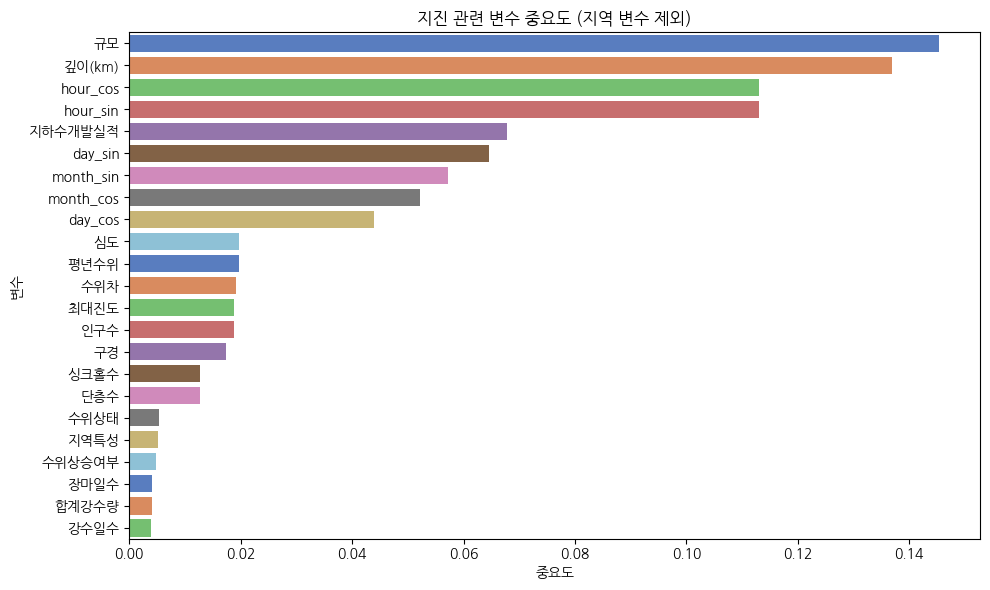

In [ ]:
# 1. Î≥ÄÏàò Ï§ëÏöîÎèÑ Ï∂îÏ∂ú
feature_importance = rf_model.feature_importances_
feature_names = X.columns

# 2. DataFrameÏúºÎ°ú Ï†ïÎ¶¨
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
})

# 3. 'ÏßÄÏó≠_'ÏúºÎ°ú ÏãúÏûëÌïòÎäî Ïª¨Îüº Ï†úÏô∏
importance_df = importance_df[~importance_df['feature'].str.startswith("ÏßÄÏó≠_")]

# 4. Ï§ëÏöîÎèÑ ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
importance_df = importance_df.sort_values(by='importance', ascending=False)

# 5. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='importance', y='feature', palette="muted")
plt.title("ÏßÄÏßÑ Í¥ÄÎ†® Î≥ÄÏàò Ï§ëÏöîÎèÑ (ÏßÄÏó≠ Î≥ÄÏàò Ï†úÏô∏)")
plt.xlabel("Ï§ëÏöîÎèÑ")
plt.ylabel("Î≥ÄÏàò")
plt.tight_layout()
plt.show()

# 6-3) XGboost

In [ ]:
from xgboost import XGBClassifier

drop_cols = ['year','ÌñâÏ†ïÍµ¨','day_week']
X=df_gb.drop(columns=drop_cols)

#ÏßÄÏó≠ ÎçîÎØ∏ Ïù∏ÏΩîÎî©
X = pd.get_dummies(X, columns=['ÏßÄÏó≠'], drop_first=False)

#Pseduo target ÏÉùÏÑ±(ÎûúÎç§ 0/1 Î¨¥ÏûëÏúÑ)
np.random.seed(42)
y_pseduo = np.random.choice([0,1], size=len(X))

#XGBoost Î™®Îç∏ ÌïôÏäµ
xgb_model = XGBClassifier(
    n_estimators=1000,
    use_label_encoder=False, #ÏµúÏã† Î≤ÑÏ†ÑÏùò xgboostÏóêÏÑú Í≤ΩÍ≥† Î∞©ÏßÄ ÏÑ§Ï†ï
    eval_metric='logloss',
    random_state=42,
    booster='gbtree',
    max_depth = 5
)
xgb_model.fit(X, y_pseduo)

#ÏúÑÌóòÎèÑ Ï†êÏàò ÏÇ¨Ïö©
xgb_risk_score = xgb_model.predict_proba(X)[:,1]

#ÏßÄÏó≠ Ïª¨Îüº Î≥µÏõê
region_cols = [col for col in X.columns if col.startswith("ÏßÄÏó≠_")]
region_df = X[region_cols].copy()
df_gb['ÏßÄÏó≠'] = region_df.idxmax(axis=1).str.replace("ÏßÄÏó≠_","")

#ÏúÑÌóòÎèÑ Ï†êÏàò Ìï†Îãπ
df_gb['xgb_risk_score'] = xgb_risk_score
df_gb['xgb_score_rank'] = df_gb['xgb_risk_score'].rank(pct=True)

#ÏßÄÏó≠Î≥Ñ ÌèâÍ∑† ÏúÑÌóòÎèÑ Í≥ÑÏÇ∞
region_risk = df_gb.groupby('ÏßÄÏó≠')[['xgb_risk_score','xgb_score_rank']].mean().reset_index().sort_values(by='xgb_risk_score', ascending=False)
region_risk

ÏßÄÏó≠  xgb_risk_score  xgb_score_rank
12  ÏòÅÏ£º        0.996251        0.882890
14  ÏòàÏ≤ú        0.784284        0.722334
19  Ï≤≠ÏÜ°        0.666567        0.640063
8   ÏÑ±Ï£º        0.660413        0.520344
9   ÏïàÎèô        0.625886        0.598494
6   Î¥âÌôî        0.600335        0.591862
16  Ïö∏ÏßÑ        0.594580        0.552649
10  ÏòÅÎçï        0.585006        0.553282
15  Ïö∏Î¶â        0.583615        0.552426
17  ÏùòÏÑ±        0.571324        0.553096
0   Í≤ΩÏ£º        0.545593        0.520680
18  Ï≤≠ÎèÑ        0.503294        0.547340
1   Í≥†Î†π        0.503136        0.530516
2   Íµ¨ÎØ∏        0.500500        0.487741
21  Ìè¨Ìï≠        0.464607        0.459929
7   ÏÉÅÏ£º        0.391307        0.388719
4   ÍπÄÏ≤ú        0.375690        0.380477
20  Ïπ†Í≥°        0.333134        0.316380
5   Î¨∏Í≤Ω        0.286483        0.302482
11  ÏòÅÏñë        0.248328        0.235133
3   Íµ∞ÏúÑ        0.013744        0.244914
13  ÏòÅÏ≤ú        0.009354        0.205008

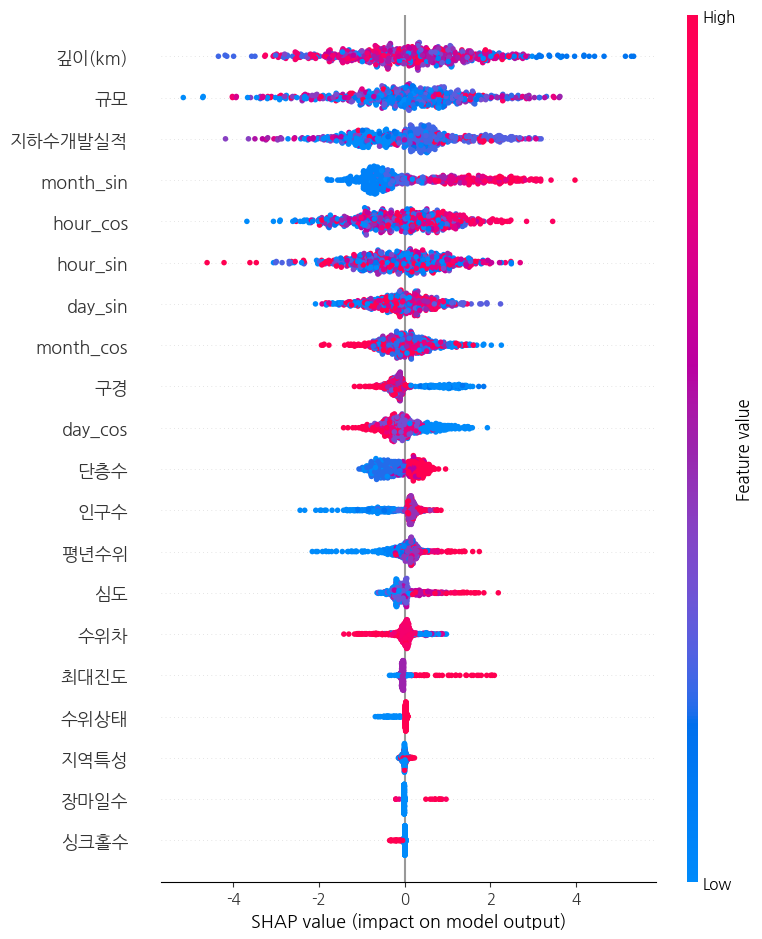

In [ ]:
import shap

# SHAP Î∂ÑÏÑù
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)

non = [col for col in X.columns if not col.startswith("ÏßÄÏó≠_")]
X_region = X[non]

#Î™®Îç∏ Î∂ÑÎ•òÏùº Í≤ΩÏö∞
if isinstance(shap_values, list):
  shap.summary_plot(shap_values[1][:, :len(X_region.columns)], X_region)
else:
  shap.summary_plot(shap_values[:, :len(X_region.columns)], X_region)

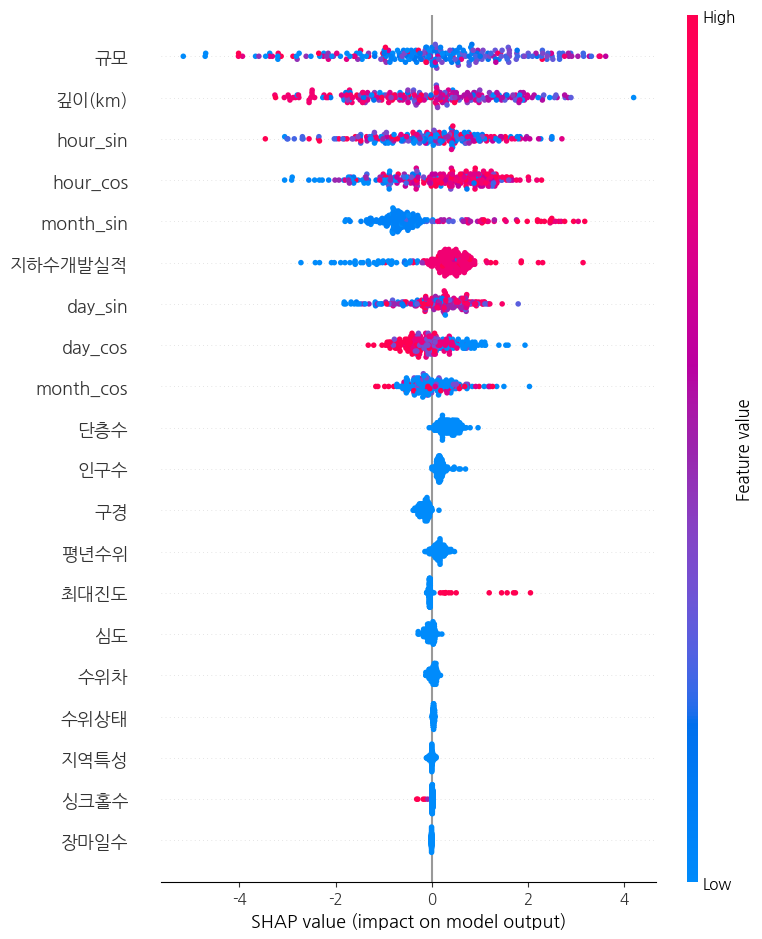

In [ ]:
# ÏßÄÏó≠ Î≥ÄÏàò Ï†úÍ±∞Ìïú Ïª¨Îüº Î¶¨Ïä§Ìä∏
non_region_cols = [col for col in X.columns if not col.startswith("ÏßÄÏó≠_")]
X_region = X[non_region_cols]

# Ìè¨Ìï≠ Ìñâ Ï∂îÏ∂ú
po = df_gb[df_gb['ÏßÄÏó≠'] == 'Í≤ΩÏ£º']
X_po = X_region.loc[po.index]

# SHAP Í∞íÎèÑ Ïó¥ Ïàò ÎßûÏ∂∞ Ïä¨ÎùºÏù¥Ïã±
shap_po = shap_values[1][po.index][:, :len(X_region.columns)] if isinstance(shap_values, list) else shap_values[po.index][:, :len(X_region.columns)]

# summary_plot
shap.summary_plot(shap_po, X_po)

# 6-4) LightGBM

In [ ]:
from lightgbm import LGBMClassifier

# 2. ÌïÑÏöî ÏóÜÎäî Ïó¥ Ï†úÍ±∞
drop_cols = ['year', 'ÌñâÏ†ïÍµ¨', 'day_week']
X = df_gb.drop(columns=drop_cols)

# 3. ÏßÄÏó≠ ÎçîÎØ∏ Ïù∏ÏΩîÎî©
X = pd.get_dummies(X, columns=['ÏßÄÏó≠'], drop_first=False)

# 4. Pseudo target ÏÉùÏÑ±
np.random.seed(42)
y_pseudo = np.random.choice([0, 1], size=len(X))

# 5. LightGBM Î™®Îç∏ ÌïôÏäµ
lgbm_model = LGBMClassifier(n_estimators=500, random_state=42, verbose=-1)
lgbm_model.fit(X, y_pseudo)

# 6. ÏúÑÌóòÎèÑ Ï†êÏàò ÏòàÏ∏° (class=1 ÌôïÎ•†)
lgbm_risk_score = lgbm_model.predict_proba(X)[:, 1]

# 7. ÏßÄÏó≠ Ïª¨Îüº Î≥µÏõê
region_cols = [col for col in X.columns if col.startswith("ÏßÄÏó≠_")]
region_df = X[region_cols].copy()
df_gb['ÏßÄÏó≠'] = region_df.idxmax(axis=1).str.replace("ÏßÄÏó≠_", "")

# 8. Ï†êÏàò Ìï†Îãπ
df_gb['lgbm_risk_score'] = lgbm_risk_score
df_gb['risk_score_rank'] = df_gb['lgbm_risk_score'].rank(pct=True)

# 9. ÏßÄÏó≠Î≥Ñ ÌèâÍ∑† ÏúÑÌóòÎèÑ Í≥ÑÏÇ∞
region_risk = (
    df_gb.groupby('ÏßÄÏó≠')[['lgbm_risk_score','risk_score_rank']]
    .mean()
    .reset_index()
    .sort_values(by='lgbm_risk_score', ascending=False)
)

In [ ]:
region_risk

ÏßÄÏó≠  lgbm_risk_score  risk_score_rank
12  ÏòÅÏ£º         0.999939         0.714658
14  ÏòàÏ≤ú         0.785668         0.635368
19  Ï≤≠ÏÜ°         0.666660         0.626500
8   ÏÑ±Ï£º         0.666612         0.575117
9   ÏïàÎèô         0.624953         0.524354
6   Î¥âÌôî         0.599963         0.493584
16  Ïö∏ÏßÑ         0.595203         0.501341
10  ÏòÅÎçï         0.584870         0.526501
15  Ïö∏Î¶â         0.583308         0.578899
17  ÏùòÏÑ±         0.571422         0.542365
0   Í≤ΩÏ£º         0.545496         0.515626
2   Íµ¨ÎØ∏         0.499971         0.444444
18  Ï≤≠ÎèÑ         0.499966         0.473005
1   Í≥†Î†π         0.499948         0.388889
21  Ìè¨Ìï≠         0.464949         0.475773
7   ÏÉÅÏ£º         0.391303         0.503912
4   ÍπÄÏ≤ú         0.374992         0.466484
20  Ïπ†Í≥°         0.333333         0.361763
5   Î¨∏Í≤Ω         0.285708         0.381400
11  ÏòÅÏñë         0.250010         0.355243
13  ÏòÅÏ≤ú         0.000012         0.250391
3   Íµ∞ÏúÑ         0.000011         0.201878